<a href="https://colab.research.google.com/github/andrerubeis/andrerubeis/blob/main/final_final_project_MML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Shoppers Intention**

>[Online Shoppers Intention](#scrollTo=ozYGUoW_iPtN)

>>[1. Loading Dataset](#scrollTo=is7kGfcpwPxP)

>>[2. Exploratory Data Analysis](#scrollTo=fOk0epkFwV6f)

>>>[2.1 Categorical Features](#scrollTo=E4d5sBr1wdXX)

>>>[2.2 Numerical Features](#scrollTo=j4FVYo7LwhCW)

>>[3 Data Cleaning](#scrollTo=t2IAZoT-vtXh)

>>[4 Preprocessing](#scrollTo=hI2u8HMWxMhQ)

>>>[4.1 Preprocessing Categorical Features: One-Hot-Encoding](#scrollTo=gQUam5sqx1vN)

>>>[4.2. Preprocessing Numerical Features: Standardization](#scrollTo=Mw9Nr5kPx7xG)

>>[5 Training](#scrollTo=KDXG0q7GyFMA)

>>>[5.1 PCA](#scrollTo=BPJb41TIZkRj)

>>>[5.2 Splitting the dataset in train and test dataset](#scrollTo=C7TgEVxAaMlH)

>>>[5.3 Balancement of the dataset](#scrollTo=0i3tqVPvzDSX)

>>>[5.4 Models Hyperparameters](#scrollTo=OfJEwkyb07oS)

>>[6 Test](#scrollTo=uF64fBHmT7hR)

>>>[6.1 Logistic Regression](#scrollTo=EygtWiKlUBq5)

>>>[Without PCA](#scrollTo=eySLVoAV1kbZ)

>>>>[6.1.1 Results](#scrollTo=r4KzSqEpeI7n)

>>>>[6.1.2 Confusion Matrix](#scrollTo=O-YjwQifeTwY)

>>>>[6.1.3 ROC Curves](#scrollTo=6qM2rgJOcxUE)

>>>[WIth PCA](#scrollTo=jH6w76YJ2-qe)

>>>[6.2 KNN](#scrollTo=QtVHB6XDF-_1)

>>>[Without PCA](#scrollTo=sSglbjKm1vPH)

>>>>[6.2.1 Results](#scrollTo=Q4G-yXAee3A3)

>>>>[6.2.1 Confusion Matrix](#scrollTo=P6k_TzI3fLyC)

>>>>[6.2.2 AUROC](#scrollTo=V2ximHPkgDkV)

>>>[6.3 SVM](#scrollTo=qw9LjuBgHZ1r)

>>>[Without PCA](#scrollTo=0I7iPqkZ1yaV)

>>>>[6.3.1 Results](#scrollTo=IkdrKLiRgK9e)

>>>>[6.3.2 Confusion Matrix](#scrollTo=suK_GXLCgP2c)

>>>>[6.3.3 AUROC](#scrollTo=JRAI6cjqgU1L)

>>>[With PCA](#scrollTo=6py8-LO52Hbd)

>>>[6.4 Random Forest](#scrollTo=jSurDR8UhqCK)

>>>[Without PCA](#scrollTo=2ViI2kme17pH)

>>>>[6.4.1 Results](#scrollTo=GRUUmQhkgeXm)

>>>>[6.4.2 Confusion Matrix](#scrollTo=vfgt_klkgiSG)

>>>>[6.4.3 AUROC](#scrollTo=IWE-h_mUgm3p)

>>>[With PCA](#scrollTo=SCqp3kDi1_am)

>>[7 Plots](#scrollTo=BWlhs7hW7r87)



In [1]:
#%% IMPORTS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.core.display import display
from matplotlib.pyplot import cm
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss 
from imblearn.combine import SMOTETomek 
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#Checking if the code is running on GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## **1. Loading Dataset**

In [3]:
#Depending on where the dataset is stored the path may change
path = r'/content/online_shoppers_intention.csv'
df = pd.read_csv(path)

## **2. Exploratory Data Analysis**

This step has to be performed in order to catch possible interesting patterns of our data. To execute a proper analysis we should first distinguish between *categorical* and *numerical* features.

### 2.1 Categorical Features

In [4]:
### Categorical Features

# Categorical Features
# Generate a summary descriptive dataframe of categorical features present in the
# original dataframe.

categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region',
                        'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

descriptions = ['string indicating month the pageview occurred.',
                'integer value that represents the user’s operating system at the time the page was viewed.',
                'integer value that represents the user’s browser at the time the page was viewed.',
                'region of the user is indicated by an integer value.',
                'category of traffic the user falls under is represented by an integer value.',
                'string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other',
                'boolean value indicating whether or not the session is on a weekend',
                'class label, boolean indicating whether or not the user completed the purchase.']

nans = [df.Month.isna().sum(),
                  df.OperatingSystems.isna().sum(),
                  df.Browser.isna().sum(),
                  df.Region.isna().sum(),
                  df.TrafficType.isna().sum(),
                  df.VisitorType.isna().sum(),
                  df.Weekend.isna().sum(),
                  df.Revenue.isna().sum()]

distinct_values =[df.Month.unique(),
                  df.OperatingSystems.unique(),
                  df.Browser.unique(),
                  df.Region.unique(),
                  df.TrafficType.unique(),
                  df.VisitorType.unique(),
                  df.Weekend.unique(),
                  df.Revenue.unique()]

count_values =  [df.Month.nunique(),
                 df.OperatingSystems.nunique(),
                 df.Browser.nunique(),
                 df.Region.nunique(),
                 df.TrafficType.nunique(),
                 df.VisitorType.nunique(),
                 df.Weekend.nunique(),
                 df.Revenue.nunique()]

df_categorical_features_description = pd.DataFrame()

df_categorical_features_description['Feature Name'] = categorical_features
df_categorical_features_description['Description'] = descriptions
df_categorical_features_description['NaNs'] = nans
df_categorical_features_description['Distinct Values'] = distinct_values
df_categorical_features_description['Distinct Count'] = count_values

df_categorical_features_description = df_categorical_features_description.sort_values('Feature Name')

del descriptions, distinct_values, count_values
df_categorical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_categorical_features_description.style.hide_index())

Feature Name,Description,NaNs,Distinct Values,Distinct Count
Browser,integer value that represents the user’s browser at the time the page was viewed.,0,[ 1 2 3 4 5 6 7 10 8 9 12 13 11],13
Month,string indicating month the pageview occurred.,0,['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'],10
OperatingSystems,integer value that represents the user’s operating system at the time the page was viewed.,0,[1 2 4 3 7 6 8 5],8
Region,region of the user is indicated by an integer value.,0,[1 9 2 3 4 5 6 7 8],9
Revenue,"class label, boolean indicating whether or not the user completed the purchase.",0,[False True],2
TrafficType,category of traffic the user falls under is represented by an integer value.,0,[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20],20
VisitorType,"string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other",0,['Returning_Visitor' 'New_Visitor' 'Other'],3
Weekend,boolean value indicating whether or not the session is on a weekend,0,[False True],2


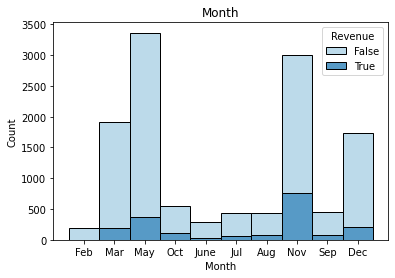

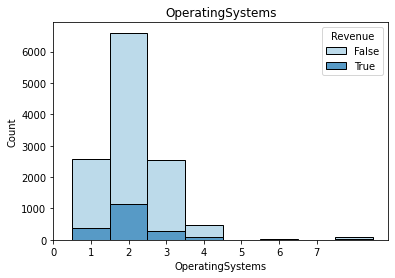

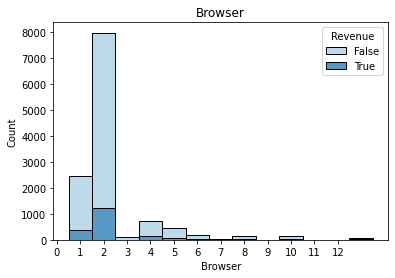

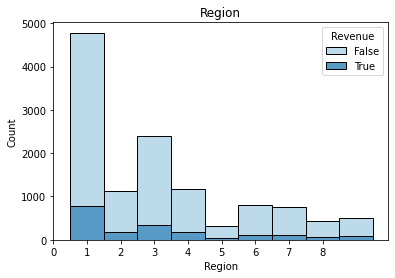

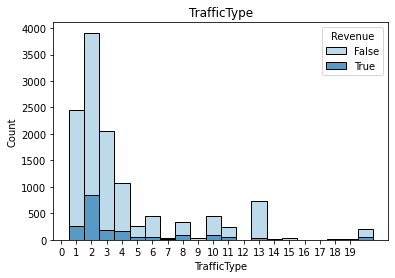

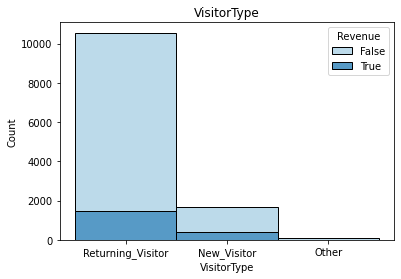

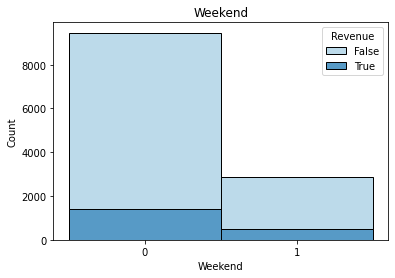

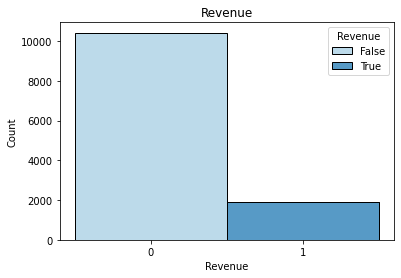

In [5]:
#Plot histograms for each categorical feature to study the frequency of values
import datetime
import time

sns.color_palette("Paired")
for feature in categorical_features:
    plt.figure()
    n_bins = df[feature].nunique()
    sns.histplot(df, x = feature, hue='Revenue', multiple='stack', bins=n_bins,discrete=True, palette='Paired')
    plt.xticks(range(0,n_bins))
    plt.title(feature)
    plt.show()
    print("")

### 2.2 Numerical Features

In [6]:
# Numerical Features
# Generate a summary descriptive dataframe of numerical features present in the
# original dataframe.

numerical_features = ['PageValues','Informational', 'ExitRates','ProductRelated',
                      'Administrative', 'SpecialDay', 'Administrative_Duration',
                      'Informational_Duration', 'BounceRates', 'ProductRelated_Duration']
print(numerical_features)
descriptions = ['average page value over the value of the target page and/or the successful completion of an online purchase',
                'how many pages of informational type the user accessed',
                'percentage of website pageviews actually end on that particular page',
                'how many product related pages the user accessed',
                'how many pages of administrative type the user accessed.',
                'closeness of the site visiting time to a special day',
                '#seconds spent on administrative pages',
                '#seconds spent on informational pages.',
                 'proportion of users that arrive on that page of the website and leave without performing any further actions',
                '#seconds spent on product related pages.'
                ]
nans = [df.PageValues.isna().sum(),
        df.Informational.isna().sum(),
        df.ExitRates.isna().sum(),
        df.ProductRelated.isna().sum(),
        df.Administrative.isna().sum(),
        df.SpecialDay.isna().sum(),
        df.Administrative_Duration.isna().sum(),
        df.Informational_Duration.isna().sum(),
        df.BounceRates.isna().sum(),
        df.ProductRelated_Duration.isna().sum()
        ]

mins =[df.PageValues.min(),
      df.Informational.min(),
      df.ExitRates.min(),
      df.ProductRelated.min(),
      df.Administrative.min(),
      df.SpecialDay.min(),
      df.Administrative_Duration.min(),
      df.Informational_Duration.min(),
      df.BounceRates.min(),
      df.ProductRelated_Duration.min(),
      ]

maxs =[df.PageValues.max(),
       df.Informational.max(),
      df.ExitRates.max(),
      df.ProductRelated.max(),
      df.Administrative.max(),
      df.SpecialDay.max(),
      df.Administrative_Duration.max(),
      df.Informational_Duration.max(),
      df.BounceRates.max(),
      df.ProductRelated_Duration.max()
      ]

means =[df.PageValues.mean(),
        df.Informational.mean(),
        df.ExitRates.mean(),
        df.ProductRelated.mean(),
        df.Administrative.mean(),
        df.SpecialDay.mean(),
        df.Administrative_Duration.mean(),
        df.Informational_Duration.mean(),
        df.BounceRates.mean(),
        df.ProductRelated_Duration.mean()
        ]

stds =[df.PageValues.std(),
       df.Informational.std(),
      df.ExitRates.std(),
      df.ProductRelated.std(),
      df.Administrative.std(),
      df.SpecialDay.std(),
      df.Administrative_Duration.std(),
      df.Informational_Duration.std(),
      df.BounceRates.std(),
      df.ProductRelated_Duration.std()
      ]

count_values =  [df.PageValues.nunique(),
                df.Informational.nunique(),
                df.ExitRates.nunique(),
                df.ProductRelated.nunique(),
                df.Administrative.nunique(),
                df.SpecialDay.nunique(),
                df.Administrative_Duration.nunique(),
                df.Informational_Duration.nunique(),
                df.BounceRates.nunique(),
                df.ProductRelated_Duration.nunique()
                ]

df_numerical_features_description = pd.DataFrame()

df_numerical_features_description['Feature Name'] = numerical_features
df_numerical_features_description['Description'] = descriptions
df_numerical_features_description['NaNs'] = nans
df_numerical_features_description['Min'] = mins
df_numerical_features_description['Max'] = maxs
df_numerical_features_description['Mean'] = means
df_numerical_features_description['Std'] = stds
df_numerical_features_description['Distinct Count'] = count_values

df_numerical_features_description=df_numerical_features_description.sort_values('Feature Name')
df_numerical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_numerical_features_description.style.hide_index())

['PageValues', 'Informational', 'ExitRates', 'ProductRelated', 'Administrative', 'SpecialDay', 'Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ProductRelated_Duration']


Feature Name,Description,NaNs,Min,Max,Mean,Std,Distinct Count
Administrative,how many pages of administrative type the user accessed.,0,0.000000,27.000000,2.315166,3.321784,27
Administrative_Duration,#seconds spent on administrative pages,0,0.000000,3398.750000,80.818611,176.779107,3335
BounceRates,proportion of users that arrive on that page of the website and leave without performing any further actions,0,0.000000,0.200000,0.022191,0.048488,1872
ExitRates,percentage of website pageviews actually end on that particular page,0,0.000000,0.200000,0.043073,0.048597,4777
Informational,how many pages of informational type the user accessed,0,0.000000,24.000000,0.503569,1.270156,17
Informational_Duration,#seconds spent on informational pages.,0,0.000000,2549.375000,34.472398,140.749294,1258
PageValues,average page value over the value of the target page and/or the successful completion of an online purchase,0,0.000000,361.763742,5.889258,18.568437,2704
ProductRelated,how many product related pages the user accessed,0,0.000000,705.000000,31.731468,44.475503,311
ProductRelated_Duration,#seconds spent on product related pages.,0,0.000000,63973.522230,1194.746220,1913.669288,9551
SpecialDay,closeness of the site visiting time to a special day,0,0.000000,1.000000,0.061427,0.198917,6


#### Boxplots

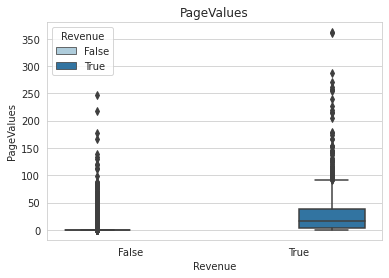

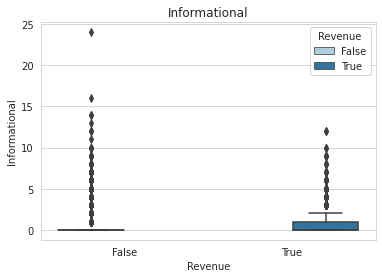

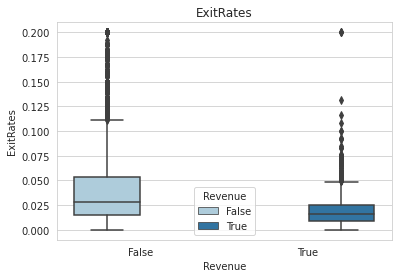

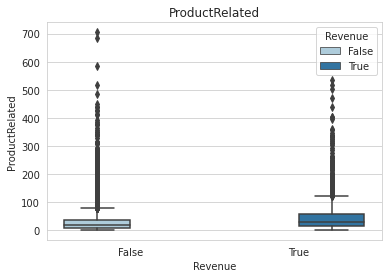

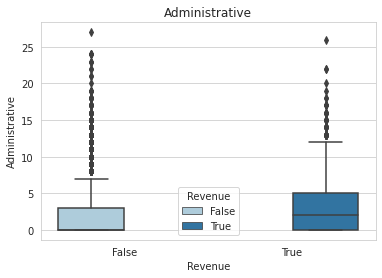

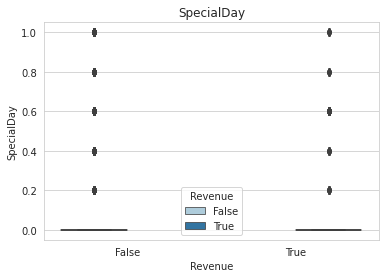

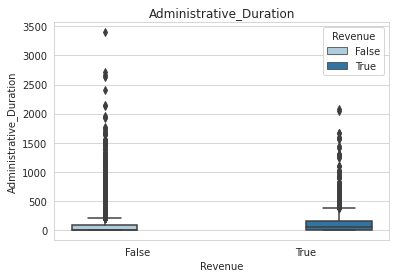

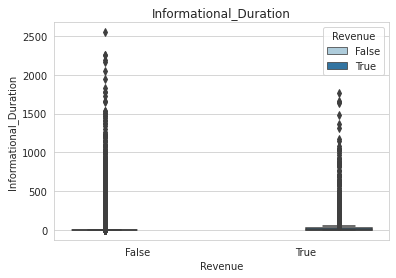

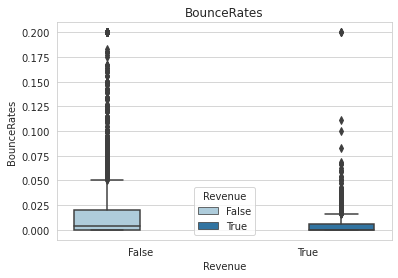

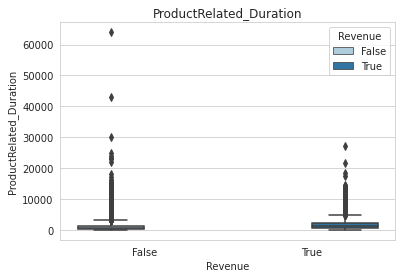

In [7]:
# BOXPLOTS
sns.set_style("whitegrid")
for feature in numerical_features: 
    plt.figure()
    sns.boxplot(x= 'Revenue', y = feature, hue='Revenue', data = df,palette='Paired')
    plt.title(feature)
    plt.legend(title='Revenue')
    plt.show()
    print("")


#### Correlation

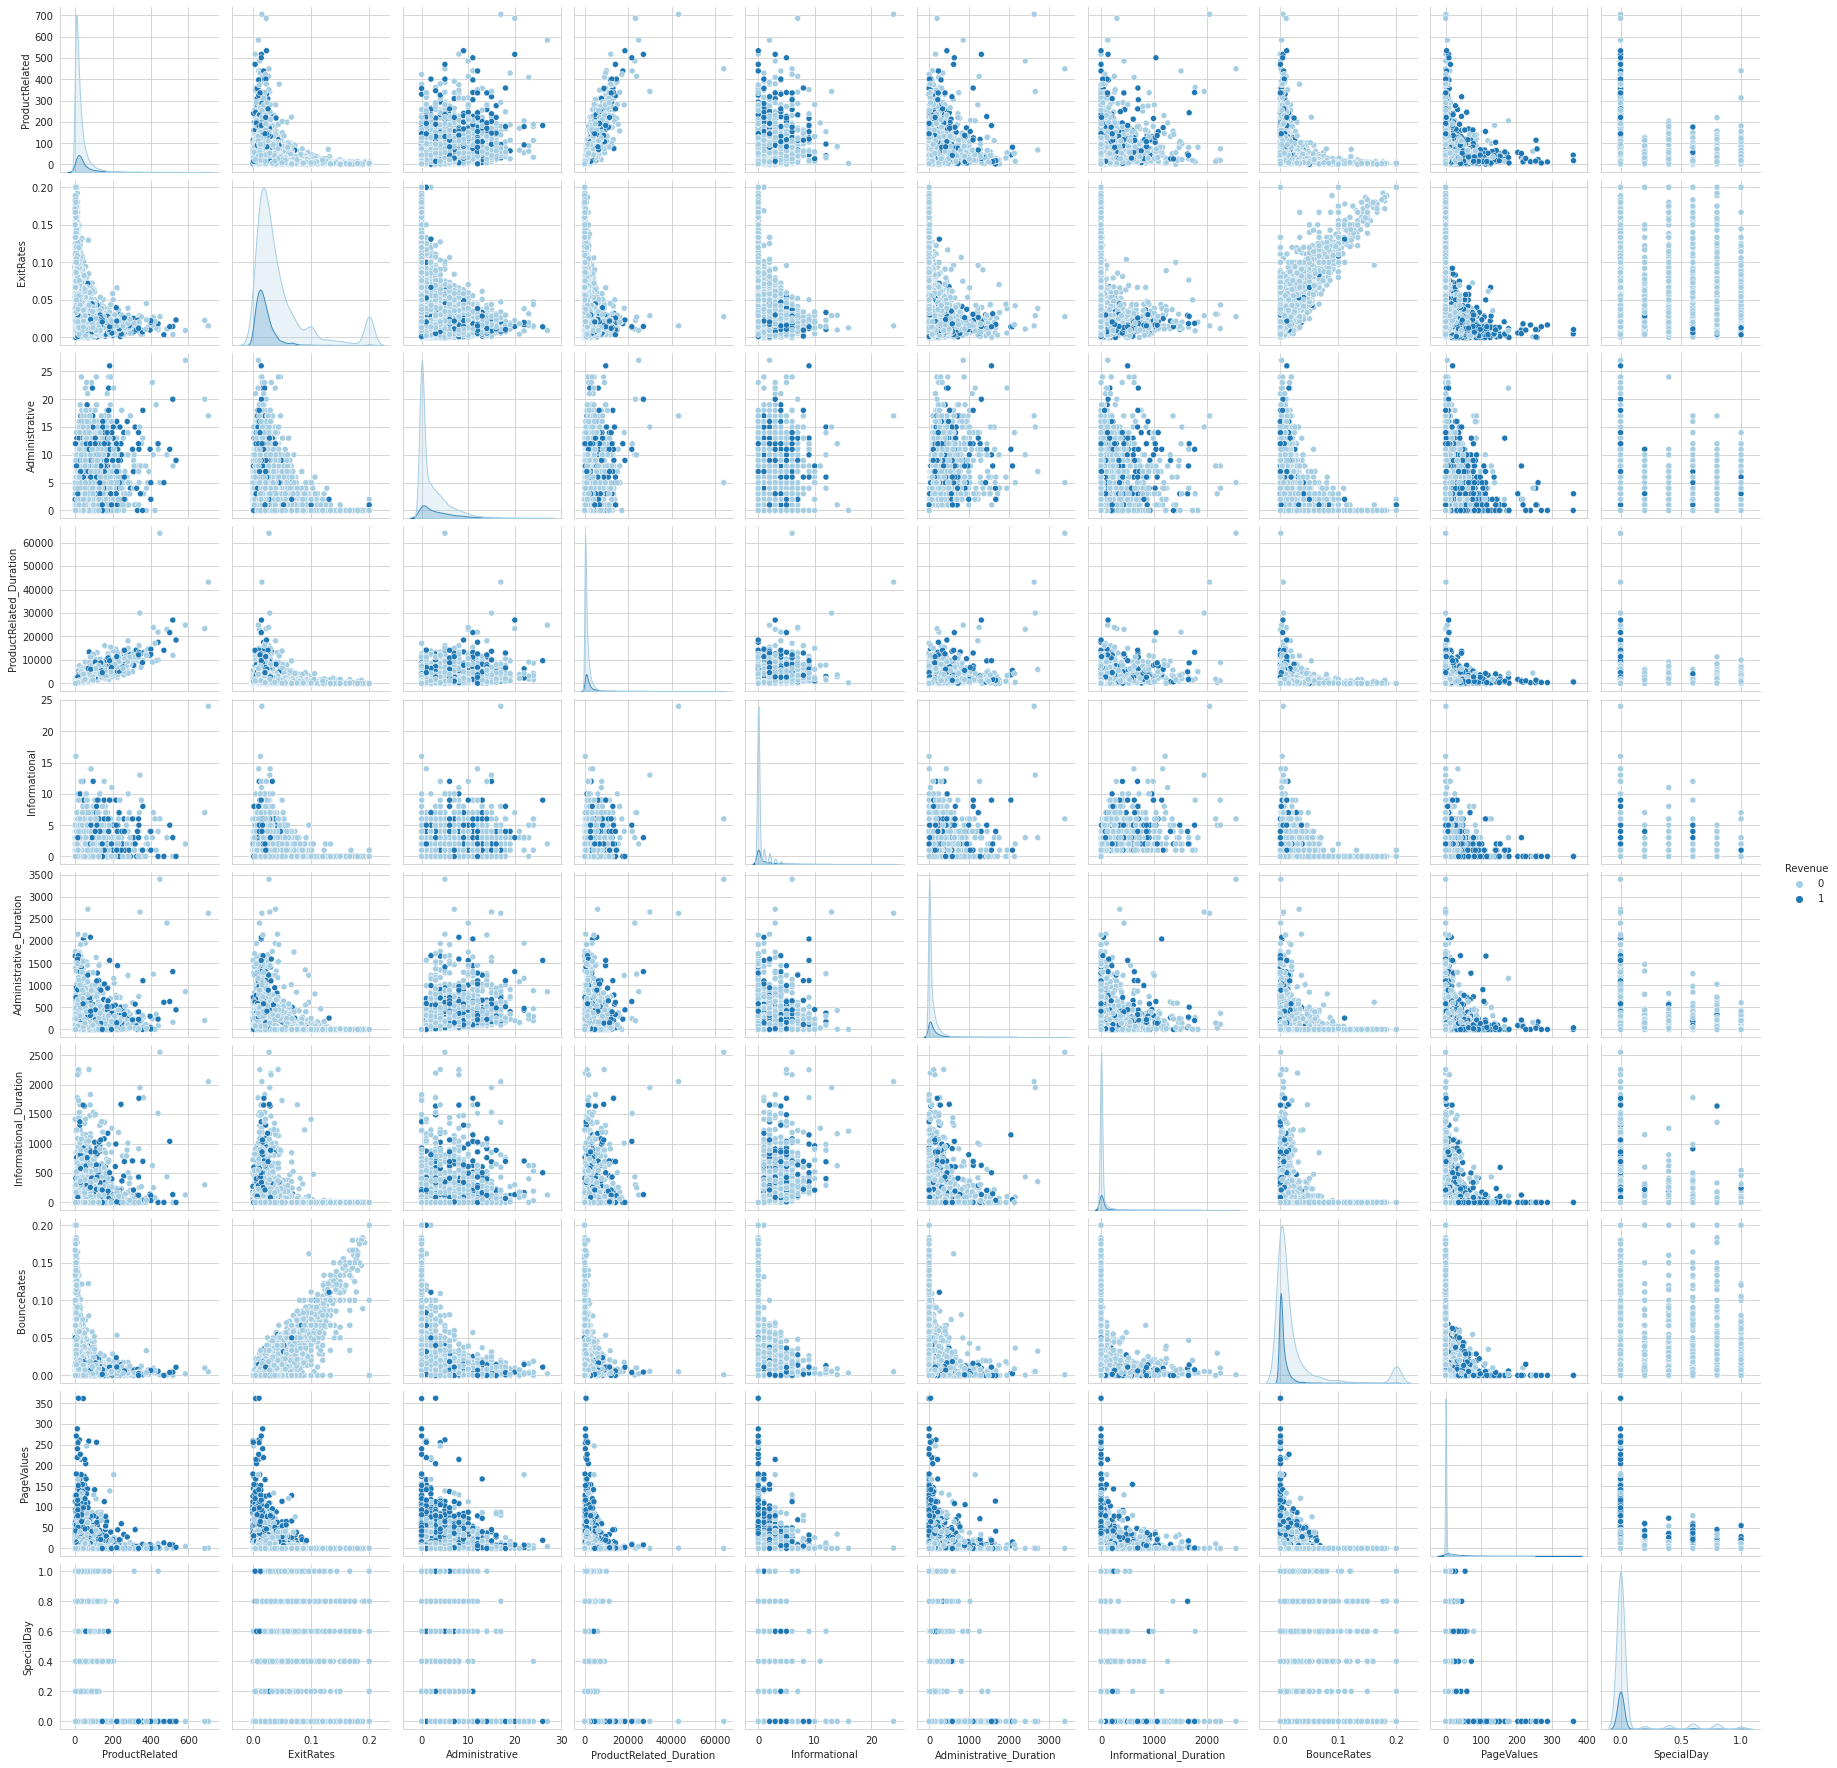

In [8]:
# CORRELATION
numerical_features = list(set(df.columns)-set(categorical_features))
numerical_features.append('Revenue') #aggiungo 'Revenue' in numerical features solo per fare il pairplot (hue)
df_numerical = df[numerical_features]
df_numerical.Revenue = df_numerical.Revenue.astype(int)
sns.pairplot(df_numerical, hue='Revenue', palette = 'Paired')

numerical_features.remove('Revenue')
df_numerical = df_numerical.drop(columns=['Revenue'])

#### Scatter Plots

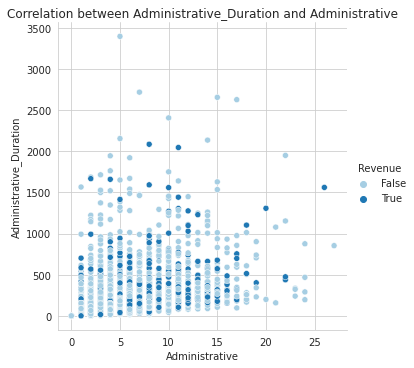

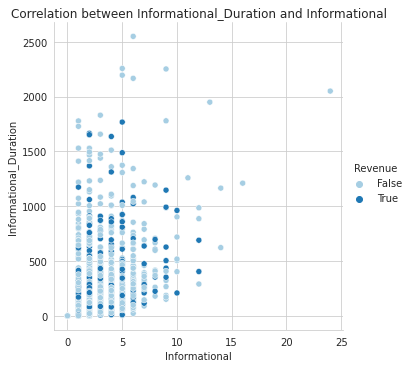

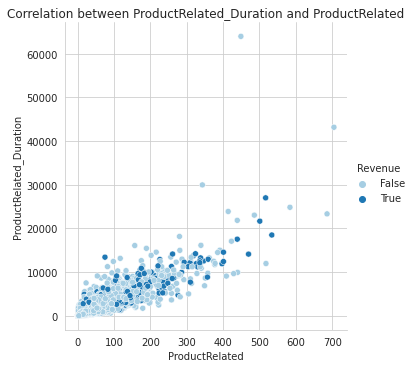

In [9]:
# SOME SCATTER PLOTS

sns.relplot(x = 'Administrative', y = 'Administrative_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Administrative_Duration and Administrative")
plt.show()
print("")

sns.relplot(x = 'Informational', y = 'Informational_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Informational_Duration and Informational")
plt.show()
print("")

sns.relplot(x = 'ProductRelated', y = 'ProductRelated_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ProductRelated_Duration and ProductRelated")
plt.show()
print("")

#### Correlation Matrix

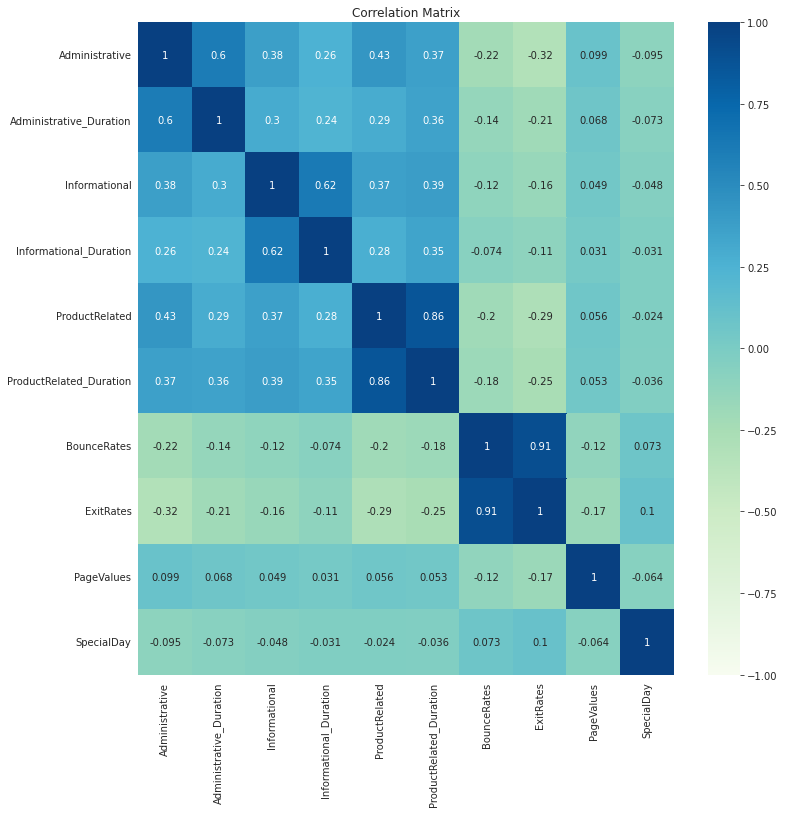

In [10]:
#%% CORRELATION MATRIX

numerical_df = df.drop(categorical_features, axis=1) #numerical df contiene tutte le numerical features più revenue
matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, annot=True, ax=ax, vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu')
plt.title("Correlation Matrix")
plt.show()

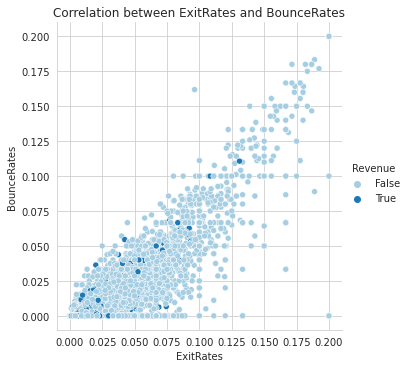

In [11]:
sns.relplot(x = 'ExitRates', y = 'BounceRates', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ExitRates and BounceRates")
plt.show()

## **3. Data Cleaning**

### Convert boolean types into integers

In [12]:
#Checking NaN values
print("Dataset information")
df.info()

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tr

In [13]:
#Convert bool type variables in integer type variables and properly write Months
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)
df.Month.replace('June', 'Jun', inplace=True)
df.Month = sorted(df.Month, key=lambda x: pd.to_datetime(x, format="%b"))

### Drop boolean types into integers

In [14]:
#Dropping correlated features seen in correlation matrix
features_dropped = ['BounceRates','Administrative_Duration', 'Informational_Duration','ProductRelated_Duration']
df = df.drop(columns=features_dropped, axis = 1)

## **4 Preprocessing**

Classifiers should be applied on numerical dataframes, so we need to first convert categorical features in numerical ones by applying the one-hot encoding technique. Then we procede with the standardization for the numerical features.

### 4.1 Preprocessing Categorical Features: One-Hot-Encoding
The one-hot-encoding technique creates from a categorical columns made by $n$ values $n$ columns more. To avoid the problem of *multicolinearity* one feature is dropped so instead of having $n$ columns more just $n-1$ are present.

In [15]:
#Update numerical features
numerical_features = list(set(numerical_features)-set(features_dropped))

# One hot encoding: specify the categorical features to one-hot-encoded
dummy_columns = ['OperatingSystems','Browser','Region','TrafficType','VisitorType', 'Weekend']

for column in categorical_features[1:-1]: #non considero Month nel ciclo perchè lo gestico a parte (1) e mi fermo prima di considerare Revenue (-1)
    df_dummies = pd.get_dummies(df[column], drop_first = True, prefix = column)
    df = pd.concat([df, df_dummies], axis = 1)

# (NOT) Accounting for all months in the calendar except Jan and Apr not present
months = ['Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for mx in months[1:]:    # drop_first = True
    df['Month_'+mx] = (df['Month'] == mx).astype('int64')

df = df.drop(columns = categorical_features[:-1]) #droppo tutte le categorical features tranne Revenue
df

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Revenue,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,...,Weekend_1,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,0,0,1,0.200000,0.000000,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0.100000,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.200000,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0.140000,0.000000,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,10,0.050000,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
12326,0,0,5,0.021333,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
12327,0,0,6,0.086667,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
12328,4,0,15,0.021053,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 4.2. Preprocessing Numerical Features: Standardization
Standardization is applied only to numerical features according to the following formula:

$z= \frac{X-\mu}{\sigma}$

In [16]:
#Preparing for standardization

y = df.Revenue.copy()
numerical_features

['ProductRelated',
 'ExitRates',
 'Administrative',
 'Informational',
 'PageValues',
 'SpecialDay']

In [17]:
import sklearn
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# scaled_df  = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
# scaled_df2 = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

# Obtain the dataset with the numerical features standardized
numerical_df = numerical_df[numerical_features]
scaled_numerical_df =  pd.DataFrame(ss.fit_transform(numerical_df), columns=numerical_df.columns)

# Merge together the one-hot-encoded dataframe of categorical features with the 
# numerical one standardized
categorical_features = list(set(df.columns)-set(numerical_features))
scaled_df = pd.concat([df[categorical_features], scaled_numerical_df], axis=1)

y = scaled_df['Revenue'].copy()
X = scaled_df.drop('Revenue',axis=1)

#Replace 0 values in categorical features with -1 to have mean = 0
#scaled_df[categorical_features] = scaled_df[categorical_features].mask(scaled_df[categorical_features] == 0, -1)
scaled_df
# features_to_add = [e for e in numerical_features if e not in features_dropped]
# scaled_df_categorical = df.drop(columns=features_to_add, axis=1)
# scaled_df = pd.concat([scaled_numerical_df, scaled_df_categorical], axis = 1)

,TrafficType_18,Month_Dec,TrafficType_2,VisitorType_Returning_Visitor,TrafficType_3,Browser_10,Month_Aug,VisitorType_Other,Region_8,TrafficType_12,...,Browser_12,Browser_9,OperatingSystems_5,Region_6,ProductRelated,ExitRates,Administrative,Informational,PageValues,SpecialDay
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.691003,3.229316,-0.696993,-0.396478,-0.317178,-0.308821
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,-0.668518,1.171473,-0.696993,-0.396478,-0.317178,-0.308821
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.691003,3.229316,-0.696993,-0.396478,-0.317178,-0.308821
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.668518,1.994610,-0.696993,-0.396478,-0.317178,-0.308821
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.488636,0.142551,-0.696993,-0.396478,-0.317178,-0.308821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0.478227,-0.288966,0.206173,-0.396478,0.342125,-0.308821
12326,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.601062,-0.447364,-0.696993,-0.396478,-0.317178,-0.308821
12327,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.578577,0.897093,-0.696993,-0.396478,-0.317178,-0.308821
12328,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.376210,-0.453140,0.507228,-0.396478,-0.317178,-0.308821


## **5 Training**

In [18]:
from sklearn.model_selection import train_test_split

seed = 13

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9864, 64) (2466, 64) (9864,) (2466,)


In [19]:
# #%% PCA (after train test split!)
# from sklearn.decomposition import PCA
# pca = PCA().fit(X_train)
# # pca_train_df = PCA_train_df.transform(X_train)

# cumvar = np.cumsum(pca.explained_variance_ratio_)

# n_comp =  np.argmax(cumvar > .9)

# #Plotting cumulative variance
# plt.plot(cumvar)
# plt.title('Cumulative variance')
# plt.xlabel('Number of components')
# plt.ylabel('Variance explained')
# print(f"{cumvar[n_comp]} expressed by {n_comp} components")

In [20]:
# # construct new dataset with 90% of variance explained.
# X_train_pca = np.dot(X_train, pca.components_[:n_comp,:].T)
# X_train_pca = pd.DataFrame(X_train_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])


# #Project test dataset on principal components found by X_train
# X_test_pca = np.dot(X_test, pca.components_[:n_comp,:].T)
# X_test_pca = pd.DataFrame(X_test_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])

# print("Train dataset shape (PCA): ", X_train_pca.shape)
# print("Test dataset shape (PCA): ", X_test_pca.shape)

In [21]:
# matrix = X_train_pca.corr()
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(matrix, annot=True, ax=ax, vmin=-1, vmax=1,center=0, fmt='.0f',cmap='GnBu')
# plt.title("Correlation Matrix PCA")
# plt.show()

### 5.2 Splitting the dataset in train and test dataset

### 5.3 Balancement of the dataset 

* **Undersampling**: NearMiss
* **Oversampling**: SMOTE
* **Oversampling-Undersampling**: SMOTETomekLinks techniques.

In [22]:
# import imblearn
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks 
# from imblearn.under_sampling import NearMiss 
# from imblearn.combine import SMOTETomek 

In [23]:
# # function to plot histograms of balanced classes
# from collections import Counter

# def plot_balance_df (X_train, y_train, sampling):
#   balanced_df = pd.concat([X_train, y_train], axis=1)
#   balanced_df=balanced_df.rename(columns={0: 'Revenue'})

#   plt.figure()
#   n_bins = balanced_df['Revenue'].nunique()
#   sns.histplot(balanced_df, x = 'Revenue', hue='Revenue', multiple='stack', bins=n_bins,discrete=True, palette='Paired')
#   plt.title('Class balance ('+ sampling+')')
#   plt.show()

In [24]:
# # Retrieve the training and test dataset for undersampling, oversampling and both
# sm = SMOTE(random_state = seed)
# undersample = NearMiss(version=1, n_neighbors=3)
# smt = SMOTETomek(random_state=seed)
                 
# X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train, y_train)
# X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train, y_train)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [25]:
# sampling = 'undersampling'
# plot_balance_df(X_train_nearmiss, y_train_nearmiss, sampling)

In [26]:
# sampling = 'oversampling'
# plot_balance_df(X_train_smote, y_train_smote, sampling)

In [27]:
# sampling = 'both'
# plot_balance_df(X_train_smote_tomek, y_train_smote_tomek, sampling)

### 5.4 Models Hyperparameters
Run the following cell only if models dictionary has not been saved, otherwise load the corresponding pickle file to avoid to retrain every model.

In [28]:
import pickle

path_no_PCA = r'/content/results_without_PCA.pkl'
with open(path_no_PCA, 'rb') as f:
    models = pickle.load(f)

path_PCA = r'/content/results_with_PCA.pkl'
with open(path_PCA, 'rb') as f:
    models_PCA = pickle.load(f)

In [29]:
# # PREPARING DATA STRUCTURE WHERE TO STORE THE RESULTS OF MODELS
# models = {}
# models = {'LR': LogisticRegression(),
#           'KNN': KNeighborsClassifier(),
#           'SVM': SVC(),
#           'RF': RandomForestClassifier()}

# models_names = ['LR', 'KNN', 'SVM', 'RF']
# hyperparams = {}

# # define logistic regression grid search params
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalties = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

# # # define grid search KNN
# n_neighbors = range(1, 10)
# weights = ['uniform', 'distance']
# metrics = ['euclidean', 'manhattan', 'minkowski']

# # define SVM params
# kernels = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gammas = ['scale']

# # # define grid search RF
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']

# datasets = ['original', 'undersampling', 'oversampling', 'both']

# for dataset in datasets:
#   models[dataset] = {}
#   for name in models_names:
#     models[dataset][name] = {}

#     #LOGISTIC REGRESSION
#     if name == 'LR':
#       #models[dataset][name]['model'] = LogisticRegression()

#       for solver in solvers:
#         models[dataset][name][solver] = {}

#         for penalty in penalties:
#           models[dataset][name][solver][penalty] = {}

#           for c in c_values:
#             models[dataset][name][solver][penalty][c] = {}


#     elif name == 'KNN':
      
#       #models[dataset][name]['model'] = KNeighborsClassifier()

#       for neighbor in n_neighbors:
#         models[dataset][name][neighbor] = {}

#         for w in weights:
#           models[dataset][name][neighbor][w] = {}

#           for metric in metrics:
#             models[dataset][name][neighbor][w][metric] = {}


#     elif name == 'SVM':

#       #models[dataset][name]['model'] = SVC()

#       for kernel in kernels:
#           models[dataset][name][kernel] = {}

#           for gamma in gammas:
#             models[dataset][name][kernel][gamma] = {}
            
#             for c in C:
#               models[dataset][name][kernel][gamma][c]  ={}
  
#     else:
#       #models[name] = {'model': RandomForestClassifier()}

#       for estimator in n_estimators:
#         models[dataset][name][estimator] = {}

#         for feature in max_features:
#           models[dataset][name][estimator][feature] = {}                    

In [30]:
def return_train_val_datasets(idx_start_val, idx_stop_val, X_train, y_train, exit = False):
# """
# Inputs: 

# - idx_start_val: index of the first element of the current validation dataset
# - idx_stop_val: index of the last element of the current validation dataset
# - X_train: 80% of original dataset (without class label Revenue)
# - y_train: 80% of original class label 'Revenue'

# Returns:

# - X_train_train: the training dataset at iteration i (9/10 of X_train)
# - X_val_train: the validation dataset at iteration i (1/10 of X_train)
# - y_train_train: the training class label at iteration i (9/10 of y_train)
# - y_val_train: the validation class label at iteration i (1/10 of y_train)
# """  

  X_val_train = X_train.iloc[idx_start_val:idx_stop_val]
  y_val_train = y_train.iloc[idx_start_val:idx_stop_val]

  #print(X_val_train.shape)
  X_train_train_sx = X_train.iloc[0:idx_start_val]
  X_train_train_dx = X_train.iloc[idx_stop_val: n_samples_training-1]
  print(X_train_train_sx.shape, X_train_train_dx.shape, idx_start_val, idx_stop_val)
  y_train_train_sx = y_train.iloc[0:idx_start_val]
  y_train_train_dx = y_train.iloc[idx_stop_val: n_samples_training-1]


  #Concat the training dataframe at the left of validation dataset with the one on the right
  #to obtain a unique training dataset to use to fit the classifier
  X_train_train = pd.concat([X_train_train_sx, X_train_train_dx], axis=0)
  y_train_train = pd.concat([y_train_train_sx, y_train_train_dx], axis=0)

  return X_train_train, X_val_train, y_train_train, y_val_train

In [31]:
#function to retrieve params to evaluate during grid search

def retrieve_params_model(model_name):
  
  if model_name == 'LR':
    # define logistic regression grid search params
    param1 = ['newton-cg', 'lbfgs', 'liblinear']      #solvers
    param2 = ['l2']                                   #penalty
    param3 = [100, 10, 1.0, 0.1, 0.01]                #C
    model = LogisticRegression()

  elif model_name == 'KNN':
    # define grid search KNN
    param1 = range(1, 10)                             #n_neighbors
    param2 = ['uniform', 'distance']                  #weights
    param3 = ['euclidean', 'manhattan', 'minkowski']  #metrics
    model = KNeighborsClassifier()

  elif model_name == 'SVM':
    # define SVM params
    param1 = ['poly', 'rbf', 'sigmoid']               #krnels
    param3 =  [50, 10, 1.0, 0.1, 0.01]                #gamma
    param2 = ['scale']                                #C

    model = SVC()

  else: #RF
    param1 = [10, 100, 1000]                          #n_estimators
    param2 = ['sqrt', 'log2']                         #max_features
    param3 = '-'
    model = RandomForestClassifier()


  return param1, param2, param3, model

In [32]:
def train_validate_model(models, model_name, X_train, y_train, smote =True, nearmiss = False, isPCA=False):

  #Retrieve all the hyperparams we want to test of the current model
  params1, params2, params3, model = retrieve_params_model(model_name)

  #Decide which scenario we want to implement
  if smote == False and nearmiss == False:
    dataset = 'original'
  elif smote == True and nearmiss == False:
    dataset = 'oversampling'
  elif smote == False and nearmiss == True:
    dataset = 'undersampling'
  else:
    dataset = 'both'


  best_f1 = 0          #to pick the best model I evaluate f1-score
  
  #Grid Search
  for param1 in params1:
    for param2 in params2:
      for param3 in params3:
            
          #Setting model and its parameters
          if model_name == 'LR':
            model = LogisticRegression(solver=param1, penalty = param2, C= param3)
          
          elif model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=param1, weights = param2, metric = param3)

          elif model_name == 'SVM':
            model = SVC(kernel=param1, gamma=param2, C=param3)
          
          else:
            model = RandomForestClassifier(n_estimators=param1, max_features=param2)
          
          print(model_name, param1, param2, param3)

          #K-Cross Validation
          idx_start_val = 0
          idx_stop_val = n_samples_val-1
          i=0

          sum_f1 = 0

         
          for i in range(n_splits): #10 total iterations for each combination of hyperparams
            print(i)

            #Checking if the last fold is a multiple of n_samples_val, if not we set the last element of the validation dataset to 
            #the last element of X_train so the last validation dataset will be a bit longer (990) than the nine seen before (986)
            if X_train.iloc[idx_stop_val:n_samples_training-1].shape[0] < n_samples_val or idx_start_val > idx_stop_val:
              idx_stop_val = n_samples_training-1
              #break
            if idx_start_val < idx_stop_val:
              X_train_train, X_val_train, y_train_train, y_val_train = return_train_val_datasets(idx_start_val, idx_stop_val, X_train, y_train)
            else:
              break
            
            idx_start_val = idx_stop_val+1
            idx_stop_val = idx_stop_val + n_samples_val

            if isPCA == True:


              #PCA has to be applied on X_train_train to find the PCs, then X_val_train
              #should be projected onto the PCs found by X_train_train to have a proper 
              #training, indeed if PCA would only be applied to X_train then the PCs 
              #obtained would come from to the validation dataset so the validation
              #step would not make sense.
              # construct new dataset with 90% of variance explained.

              # PCA X_train_train

              pca = PCA().fit(X_train_train)
              X_train_train_pca = pca.transform(X_train_train)

              cumvar = np.cumsum(pca.explained_variance_ratio_)

              n_comp =  np.argmax(cumvar > .9)

              X_train_train_pca = np.dot(X_train_train, pca.components_[:n_comp,:].T)
              X_train_train_pca = pd.DataFrame(X_train_train_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])

              # PCA X_val_train
              X_val_train_pca = np.dot(X_val_train, pca.components_[:n_comp,:].T)
              X_val_train_pca = pd.DataFrame(X_val_train_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])
            
            #End if

            #Before training the classifiers we should apply resampling techniques
            # ONLY to training datasets and leave as it is the validation dataset.

            #Oversampling and Undersampling scenario
            if smote == True and nearmiss == True:
              X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train_train, y_train_train)
              model = model.fit(X_train_smote_tomek, y_train_smote_tomek)
            
            #Undersampling scenario
            elif smote == False and nearmiss == True:
              X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train_train, y_train_train)
              model = model.fit(X_train_nearmiss, y_train_nearmiss)
            
            #Oversampling scenario
            elif smote == True and nearmiss == False:
              X_train_smote, y_train_smote = sm.fit_resample(X_train_train, y_train_train)
              model = model.fit(X_train_smote, y_train_smote)
            
            #Original scenario
            else:
              print("original")
              model = model.fit(X_train_train, y_train_train)
              
            #Validation on current fold
            y_pred_val = model.predict(X_val_train)

            #Print the results and store the results obtained
            cr = classification_report(y_pred_val, y_val_train, output_dict=True)
            print(cr)
            print("")

            if model_name == 'RF':
              models[dataset][model_name][param1][param2]= cr
            else:
              models[dataset][model_name][param1][param2][param3] =cr

            sum_f1 = sum_f1 + cr['weighted avg']['f1-score']
          
          #Compute the mean of the results after the 10 iterations of a specific
          #combination of hyperparameters are completed and see if outperforms the
          #results reached for a different combination seen before.
          mean_f1 = sum_f1/n_splits


          #Store best weighted f1-score and the current hyperparams 
          if( mean_f1 > best_f1):
            best_f1 = mean_f1
            print(f"Best f1-score: {best_f1:.3f} - [{param1}, {param2}, {param3}]")
            models[dataset][model_name]['bestParamsF1'] = [best_f1, param1, param2, param3]



            if model_name == 'RF':
              models[dataset][model_name]['bestParamsF1'] = [best_f1, param1, param2, param3]

            else:
              models[dataset][model_name]['bestParamsF1'] = [best_f1, param1, param2, param3]

  return models

In [33]:
#%% INITIALIZATION OF PARAMETERS FOR CROSS VALIDATION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report


#Take X_train and split it in n_splits folds to perform cross validation
#one of them is used to validate and the others to train the models
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss 
from imblearn.combine import SMOTETomek 

#fig, ax = plt.subplots()
# cmap_data = plt.cm.Paired
# cmap_cv = plt.cm.coolwarm

n_splits = 10

sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)

#tl = TomekLinks(sampling_strategy='minority ')


n_samples_training = X_train.shape[0]
n_samples_val = int(n_samples_training/n_splits)
print(n_samples_training, n_samples_val)

#start and stop are indexes used to delimit the current validation dataset
#at the beginning are 0 and n_samples_val-1, then will be n_smaples, 2*n_samples_val-1 and so on
idx_start_val = 0
idx_stop_val = n_samples_val-1


#Decide which classifier to train and which scenario to implement

#model_name = 'LR'
#models = train_validate_model(models, model_name, X_train, y_train, smote =False, nearmiss = False, isPCA = False)



9864 986


In [34]:
# #Save results for a certain model and scenario
# import pickle
# with open('\results_without_PCA2.pkl', 'wb') as f:
#     pickle.dump(models, f)

## 6 Test

In [35]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
X_train_pca = pca.transform(X_train)

cumvar = np.cumsum(pca.explained_variance_ratio_)

n_comp =  np.argmax(cumvar > .9)

X_train_pca = np.dot(X_train, pca.components_[:n_comp,:].T)
X_train_pca = pd.DataFrame(X_train_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])

# PCA X_val_train
X_test_pca = np.dot(X_test, pca.components_[:n_comp,:].T)
X_test_pca = pd.DataFrame(X_test_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])

y_train.shape, X_test_pca.shape

((9864,), (2466, 17))

0.9023248477821509 expressed by 17 components


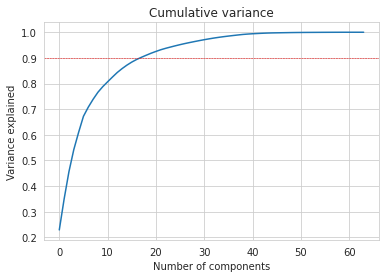

In [36]:
# #%% PCA (after train test split!)

# #Plotting cumulative variance
plt.plot(cumvar)
plt.axhline(y=0.9, color='r', lw=0.5,linestyle='dashed')
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
print(f"{cumvar[n_comp]} expressed by {n_comp} components")

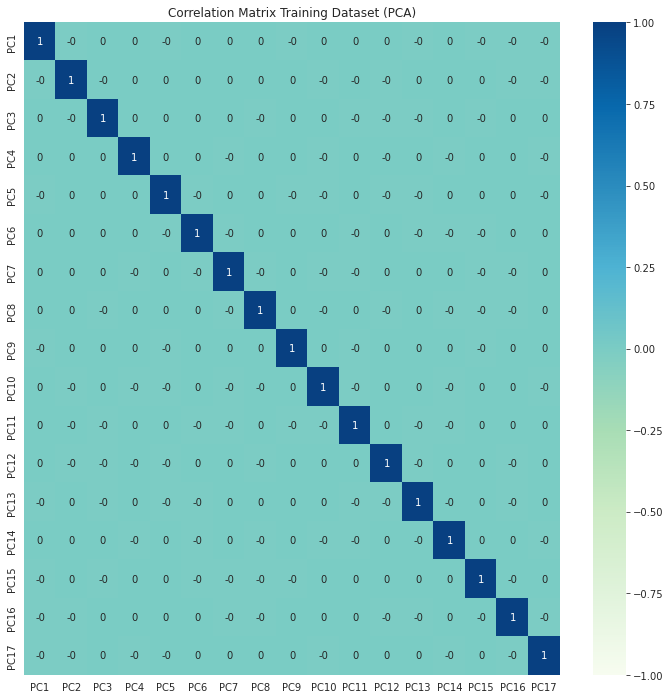

In [37]:
#%% PCA CORRELATION MATRIX

matrix = X_train_pca.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, annot=True, ax=ax, vmin=-1, vmax=1,center=0, fmt='.0f',cmap='GnBu')
plt.title("Correlation Matrix Training Dataset (PCA)")
plt.show()

In [38]:
#fitting the resampling methods to the whole training dataset (all 10 folds)
sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)
                 
#Without PCA
X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train, y_train)

#With PCA
X_train_nearmiss_pca, y_train_nearmiss_pca = undersample.fit_resample(X_train_pca, y_train)
X_train_smote_pca, y_train_smote_pca = sm.fit_resample(X_train_pca, y_train)
X_train_smote_tomek_pca, y_train_smote_tomek_pca = smt.fit_resample(X_train_pca, y_train)

In [39]:
print(X_train.shape, y_train.shape)
print(X_train_nearmiss.shape, y_train_nearmiss.shape)
print(X_train_smote.shape, y_train_smote.shape)
print(X_train_smote_tomek.shape, y_train_smote_tomek.shape)

(9864, 64) (9864,)
(3052, 64) (3052,)
(16676, 64) (16676,)
(16626, 64) (16626,)


In [40]:
print(X_train_pca.shape, y_train.shape)
print(X_train_nearmiss_pca.shape, y_train_nearmiss_pca.shape)
print(X_train_smote_pca.shape, y_train_smote_pca.shape)
print(X_train_smote_tomek_pca.shape, y_train_smote_tomek_pca.shape)

(9864, 17) (9864,)
(3052, 17) (3052,)
(16676, 17) (16676,)
(16594, 17) (16594,)


In [41]:
#Creating the results dictionary where to store all the results
datasets = ['original', 'undersampling', 'oversampling', 'both']
models_names = ['LR', 'KNN', 'SVM', 'RF']

results = {}
results_pca = {}

for d in datasets:
  results[d] = {}
  results_pca[d] = {}
  for mn in models_names:
    results[d][mn] = {}
    results[d][mn]['params'] = {}
    results[d][mn]['predictions'] = {}

    results_pca[d][mn] = {}
    results_pca[d][mn]['params'] = {}
    results_pca[d][mn]['predictions'] = {}

results

{'original': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}},
 'undersampling': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}},
 'oversampling': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}},
 'both': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}}}

In [42]:
#Creating the results dictionary where to store all the results
datasets = ['original', 'undersampling', 'oversampling', 'both']
models_names = ['LR', 'KNN', 'SVM', 'RF']

test_metrics = {}
test_metrics_pca = {}

for d in datasets:
  test_metrics[d] = {}
  test_metrics_pca[d] = {}
  for mn in models_names:
    test_metrics[d][mn] = {}
    test_metrics[d][mn]['accuracy'] = 0
    test_metrics[d][mn]['precision'] = 0
    test_metrics[d][mn]['recall'] = 0
    test_metrics[d][mn]['f1-score'] = 0
    test_metrics[d][mn]['auroc'] = 0

    test_metrics_pca[d][mn] = {}
    test_metrics_pca[d][mn]['accuracy'] = 0
    test_metrics_pca[d][mn]['precision'] = 0
    test_metrics_pca[d][mn]['recall'] = 0
    test_metrics_pca[d][mn]['f1-score'] = 0
    test_metrics_pca[d][mn]['auroc'] = 0



In [43]:
#function to retrieve the confusion matrix for each model and dataset
from sklearn.metrics import confusion_matrix

def confusion_matrixes (model_name, dataset, results, pca=''):

  if dataset == 'original':
    dataset_title = 'original'
  elif dataset == 'undersampling':
    dataset_title = 'NearMiss'
  elif dataset == 'oversampling':
    dataset_title = 'SMOTE'
  else:
    dataset_title = 'SMOTETomekLinks'

  if model_name == 'LR':
    model_title = 'Logistic Regression'
    cmap_model = 'GnBu'
  elif model_name == 'KNN':
    model_title = 'K-Nearest Neighbors'
    cmap_model = 'YlOrBr'
  elif model_name == 'SVM':
    model_title = 'Support Vector Machine'
    cmap_model = 'OrRd'
  else:
    model_title = 'Random Forest'
    cmap_model = 'BuGn'

  plt.figure()
  cm = confusion_matrix(y_test, results[dataset][model_name]['predictions'])
  
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt='', cmap=cmap_model)
  #sns.heatmap(cm_original/np.sum(cm_original), annot=True, fmt='.3f', vmin=0, vmax=1,center=0.5 ,cmap='GnBu')
  plt.title(f"Confusion Matrix {pca} {model_title} ({dataset_title})")
  


In [44]:
#function to retrieve theauROC for each model and dataset
from sklearn import metrics
def auroc (model_name, dataset, results, pca = ''):

  if dataset == 'original':
    dataset_title = 'original'
  elif dataset == 'undersampling':
    dataset_title = 'NearMiss'
  elif dataset == 'oversampling':
    dataset_title = 'SMOTE'
  else:
    dataset_title = 'SMOTETomekLinks'

  fpr, tpr, threshold = metrics.roc_curve(y_test, results[dataset][model_name]['predictions'])
  roc_auc = metrics.auc(fpr, tpr)

  print(f'{model_name} - AUROC {pca} {dataset_title}: ', roc_auc)
  return roc_auc

### 6.1 Logistic Regression

###  Without PCA

#### 6.1.1 Results

In [45]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['LR']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['LR']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['LR']['bestParamsF1'][-3:])
print('both: ', models['both']['LR']['bestParamsF1'][-3:])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['LR']['bestParamsF1'][-3:])
print('undersampling: ', models_PCA['undersampling']['LR']['bestParamsF1'][-3:])
print('oversampling: ', models_PCA['oversampling']['LR']['bestParamsF1'][-3:])
print('both: ', models_PCA['both']['LR']['bestParamsF1'][-3:])

Without PCA
original:  ['liblinear', 'l2', 0.1]
undersampling:  ['liblinear', 'l2', 0.01]
oversampling:  ['liblinear', 'l2', 0.01]
both:  ['liblinear', 'l2', 0.01]

With PCA
original:  ['liblinear', 'l2', 0.1]
undersampling:  ['liblinear', 'l2', 0.01]
oversampling:  ['liblinear', 'l2', 0.01]
both:  ['liblinear', 'l2', 0.01]


In [46]:
# results['original']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.1}
# results['undersampling']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
# results['oversampling']['LR']['params']={'solver':'liblinear', 'penalty':'l2', 'C':0.01}
# results['both']['LR']['params'] = {'solver':'liblinear', 'penalty':'l2', 'C':0.01}

# results_pca['original']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
# results_pca['undersampling']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
# results_pca['oversampling']['LR']['params']={'solver':'newton-cg', 'penalty':'l2', 'C':100}
# results_pca['both']['LR']['params'] = {'solver':'newton-cg', 'penalty':'l2', 'C':100}

results['original']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.1}
results['undersampling']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results['oversampling']['LR']['params']={'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results['both']['LR']['params'] = {'solver':'liblinear', 'penalty':'l2', 'C':0.01}

results_pca['original']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.1}
results_pca['undersampling']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results_pca['oversampling']['LR']['params']={'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results_pca['both']['LR']['params'] = {'solver':'liblinear', 'penalty':'l2', 'C':0.01}

In [47]:
lr = LogisticRegression()

results['original']['LR']['predictions']= lr.set_params(**results['original']['LR']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['LR']['predictions'] = lr.set_params(**results['undersampling']['LR']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['LR']['predictions'] = lr.set_params(**results['oversampling']['LR']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['LR']['predictions'] = lr.set_params(**results['both']['LR']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['LR']['predictions']= lr.set_params(**results_pca['original']['LR']['params']).fit(X_train_pca, y_train).predict(X_test_pca)
results_pca['undersampling']['LR']['predictions'] = lr.set_params(**results_pca['undersampling']['LR']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['LR']['predictions'] = lr.set_params(**results_pca['oversampling']['LR']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['LR']['predictions'] = lr.set_params(**results_pca['both']['LR']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [48]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'LR'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]


print(classification_report(results['original']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['LR']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['LR']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['undersampling']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['oversampling']['LR']['predictions'], y_test, output_dict=True))
print(classification_report(results_pca['both']['LR']['predictions'], y_test, output_dict=True))

{'0': {'precision': 0.9832053742802304, 'recall': 0.8889370932754881, 'f1-score': 0.9336978810663021, 'support': 2305}, '1': {'precision': 0.3298429319371728, 'recall': 0.782608695652174, 'f1-score': 0.4640883977900553, 'support': 161}, 'accuracy': 0.8819951338199513, 'macro avg': {'precision': 0.6565241531087016, 'recall': 0.835772894463831, 'f1-score': 0.6988931394281788, 'support': 2466}, 'weighted avg': {'precision': 0.9405487022537777, 'recall': 0.8819951338199513, 'f1-score': 0.9030380567323704, 'support': 2466}}
{'0': {'precision': 0.789827255278311, 'recall': 0.9547563805104409, 'f1-score': 0.8644957983193278, 'support': 1724}, '1': {'precision': 0.7958115183246073, 'recall': 0.40970350404312667, 'f1-score': 0.5409252669039145, 'support': 742}, 'accuracy': 0.7907542579075426, 'macro avg': {'precision': 0.7928193868014591, 'recall': 0.6822299422767838, 'f1-score': 0.7027105326116212, 'support': 2466}, 'weighted avg': {'precision': 0.7916278729507976, 'recall': 0.7907542579075426

#### 6.1.2 Confusion Matrix

Test dataset samples:  2466


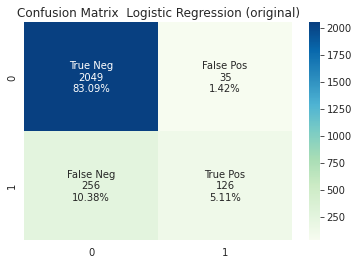

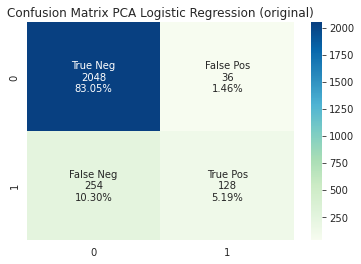

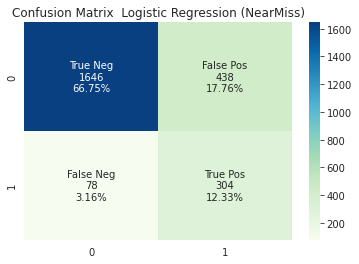

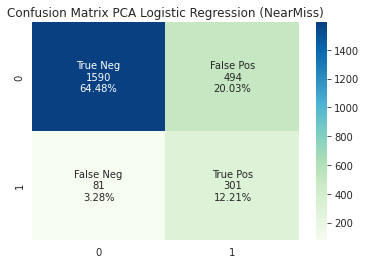

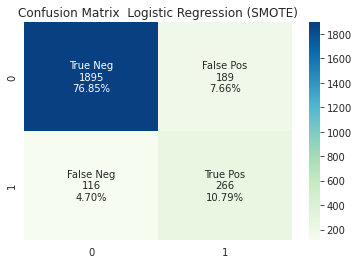

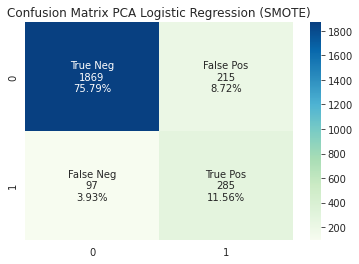

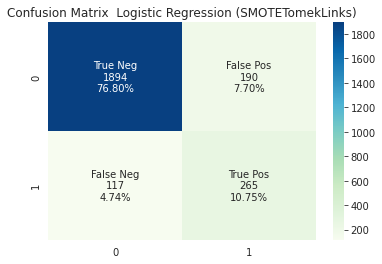

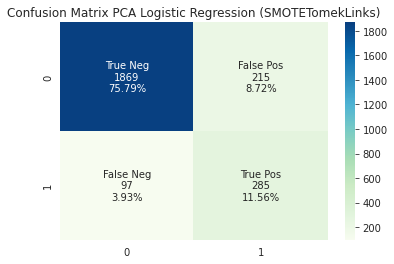

In [51]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('LR', 'original', results)
confusion_matrixes('LR', 'original', results_pca, pca='PCA')

confusion_matrixes('LR', 'undersampling', results)
confusion_matrixes('LR', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('LR', 'oversampling',results)
confusion_matrixes('LR', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('LR', 'both', results)
confusion_matrixes('LR', 'both', results_pca, pca='PCA')

#### 6.1.3 ROC Curves

In [52]:
test_metrics['original']['LR']['auroc'] = auroc ('LR', 'original', results)
test_metrics['undersampling']['LR']['auroc'] = auroc ('LR', 'undersampling', results)
test_metrics['oversampling']['LR']['auroc'] = auroc ('LR', 'oversampling', results)
test_metrics['both']['LR']['auroc'] = auroc ('LR', 'both', results)
print("")
test_metrics_pca['original']['LR']['auroc'] = auroc ('LR', 'original', results_pca, pca = 'PCA')
test_metrics_pca['undersampling']['LR']['auroc'] = auroc ('LR', 'undersampling', results_pca, pca = 'PCA')
test_metrics_pca['oversampling']['LR']['auroc'] = auroc ('LR', 'oversampling', results_pca, pca = 'PCA')
test_metrics_pca['both']['LR']['auroc'] = auroc ('LR', 'both', results_pca, pca = 'PCA')

LR - AUROC  original:  0.6565241531087016
LR - AUROC  NearMiss:  0.7928193868014591
LR - AUROC  SMOTE:  0.8028220498236375
LR - AUROC  SMOTETomekLinks:  0.8012732260755093

LR - AUROC PCA original:  0.6589020309312538
LR - AUROC PCA NearMiss:  0.7754569846549628
LR - AUROC PCA SMOTE:  0.82145315593251
LR - AUROC PCA SMOTETomekLinks:  0.82145315593251


### 6.2 KNN 

#### 6.2.1 Results

In [53]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['KNN']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['KNN']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['KNN']['bestParamsF1'][-3:])
print('both: ', models['both']['KNN']['bestParamsF1'][-3:])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['KNN']['bestParamsF1'][-3:])
print('undersampling: ', models_PCA['undersampling']['KNN']['bestParamsF1'][-3:])
print('oversampling: ', models_PCA['oversampling']['KNN']['bestParamsF1'][-3:])
print('both: ', models_PCA['both']['KNN']['bestParamsF1'][-3:])

Without PCA
original:  [8, 'uniform', 'manhattan']
undersampling:  [8, 'uniform', 'manhattan']
oversampling:  [2, 'uniform', 'manhattan']
both:  [2, 'uniform', 'manhattan']

With PCA
original:  [8, 'uniform', 'manhattan']
undersampling:  [8, 'uniform', 'manhattan']
oversampling:  [2, 'uniform', 'manhattan']
both:  [2, 'uniform', 'manhattan']


In [54]:
# results['original']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
# results['undersampling']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
# results['oversampling']['KNN']['params']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
# results['both']['KNN']['params'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

# results_pca['original']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
# results_pca['undersampling']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
# results_pca['oversampling']['KNN']['params']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
# results_pca['both']['KNN']['params'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

results['original']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results['undersampling']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results['oversampling']['KNN']['params']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
results['both']['KNN']['params'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

results_pca['original']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results_pca['undersampling']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results_pca['oversampling']['KNN']['params']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
results_pca['both']['KNN']['params'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

In [55]:
knn = KNeighborsClassifier()

results['original']['KNN']['predictions'] = knn.set_params(**results['original']['KNN']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['KNN']['predictions'] = knn.set_params(**results['undersampling']['KNN']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['KNN']['predictions'] = knn.set_params(**results['oversampling']['KNN']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['KNN']['predictions'] = knn.set_params(**results['both']['KNN']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['KNN']['predictions']= knn.set_params(**results_pca['original']['KNN']['params']).fit(X_train_pca, y_train).predict(X_test_pca)
results_pca['undersampling']['KNN']['predictions'] = knn.set_params(**results_pca['undersampling']['KNN']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['KNN']['predictions'] = knn.set_params(**results_pca['oversampling']['KNN']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['KNN']['predictions'] = knn.set_params(**results_pca['both']['KNN']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [56]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'KNN'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]

print(classification_report(results['original']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['KNN']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['KNN']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['undersampling']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['oversampling']['KNN']['predictions'], y_test, output_dict=True))
print(classification_report(results_pca['both']['KNN']['predictions'], y_test, output_dict=True))

{'0': {'precision': 0.9875239923224568, 'recall': 0.8757446808510638, 'f1-score': 0.9282814614343707, 'support': 2350}, '1': {'precision': 0.2356020942408377, 'recall': 0.7758620689655172, 'f1-score': 0.36144578313253006, 'support': 116}, 'accuracy': 0.8710462287104623, 'macro avg': {'precision': 0.6115630432816472, 'recall': 0.8258033749082905, 'f1-score': 0.6448636222834504, 'support': 2466}, 'weighted avg': {'precision': 0.9521537813826887, 'recall': 0.8710462287104623, 'f1-score': 0.9016176582376905, 'support': 2466}}
{'0': {'precision': 0.8474088291746641, 'recall': 0.9089037570766856, 'f1-score': 0.8770797119443756, 'support': 1943}, '1': {'precision': 0.5366492146596858, 'recall': 0.3919694072657744, 'f1-score': 0.45303867403314924, 'support': 523}, 'accuracy': 0.7992700729927007, 'macro avg': {'precision': 0.692029021917175, 'recall': 0.65043658217123, 'f1-score': 0.6650591929887624, 'support': 2466}, 'weighted avg': {'precision': 0.78150157921873, 'recall': 0.7992700729927007,

#### 6.2.1 Confusion Matrix

Test dataset samples:  2466


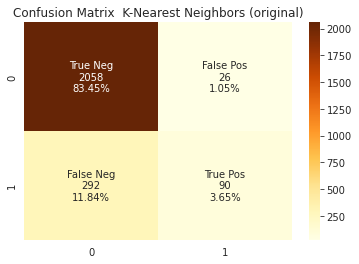

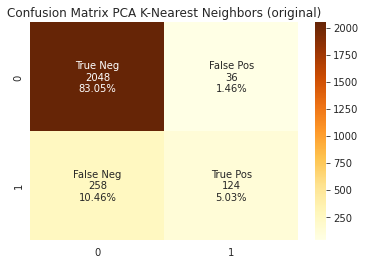

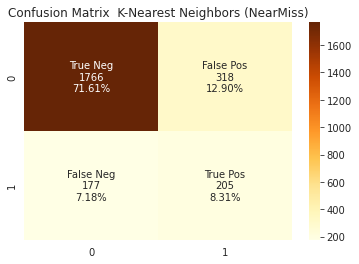

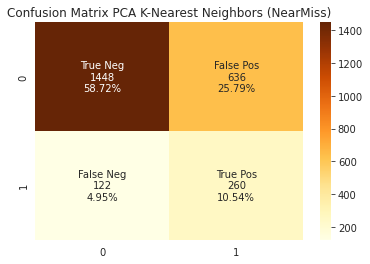

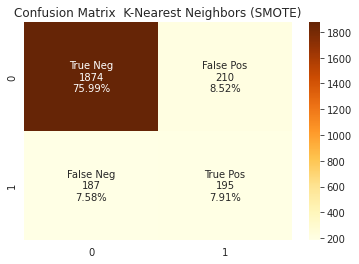

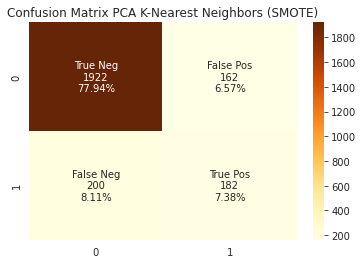

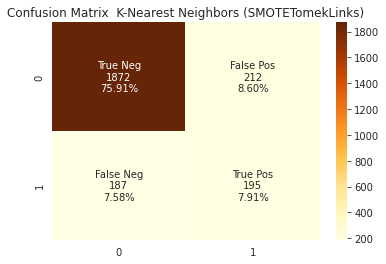

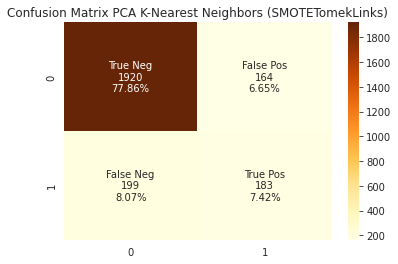

In [57]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('KNN', 'original', results)
confusion_matrixes('KNN', 'original', results_pca, pca='PCA')

confusion_matrixes('KNN', 'undersampling', results)
confusion_matrixes('KNN', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('KNN', 'oversampling',results)
confusion_matrixes('KNN', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('KNN', 'both', results)
confusion_matrixes('KNN', 'both', results_pca, pca='PCA')

#### 6.2.2 AUROC

In [58]:
test_metrics['original']['KNN']['auroc'] = auroc ('KNN', 'original', results)
test_metrics['undersampling']['KNN']['auroc'] = auroc ('KNN', 'undersampling', results)
test_metrics['oversampling']['KNN']['auroc'] = auroc ('KNN', 'oversampling', results)
test_metrics['both']['KNN']['auroc'] = auroc ('KNN', 'both', results)
print("")
test_metrics_pca['original']['KNN']['auroc'] = auroc ('KNN', 'original', results_pca, pca = 'PCA')
test_metrics_pca['undersampling']['KNN']['auroc'] = auroc ('KNN', 'undersampling', results_pca, pca = 'PCA')
test_metrics_pca['oversampling']['KNN']['auroc'] = auroc ('KNN', 'oversampling', results_pca, pca = 'PCA')
test_metrics_pca['both']['KNN']['auroc'] = auroc ('KNN', 'both', results_pca, pca = 'PCA')

KNN - AUROC  original:  0.6115630432816472
KNN - AUROC  NearMiss:  0.6920290219171749
KNN - AUROC  SMOTE:  0.7048517249349318
KNN - AUROC  SMOTETomekLinks:  0.7043718784857955

KNN - AUROC PCA original:  0.653666428837013
KNN - AUROC PCA NearMiss:  0.6877229653003185
KNN - AUROC PCA SMOTE:  0.6993523329079198
KNN - AUROC PCA SMOTETomekLinks:  0.7001813869823437


### 6.3 SVM

### Without PCA

#### 6.3.1 Results

In [59]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['SVM']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['SVM']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['SVM']['bestParamsF1'][-3:])
print('both: ', models['both']['SVM']['bestParamsF1'][-3:])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['SVM']['bestParamsF1'][-3:])
print('undersampling: ', models_PCA['undersampling']['SVM']['bestParamsF1'][-3:])
print('oversampling: ', models_PCA['oversampling']['SVM']['bestParamsF1'][-3:])
print('both: ', models_PCA['both']['SVM']['bestParamsF1'][-3:])

Without PCA
original:  ['rbf', 'scale', 0.01]
undersampling:  ['poly', 'scale', 0.01]
oversampling:  ['poly', 'scale', 0.01]
both:  ['poly', 'scale', 0.01]

With PCA
original:  ['rbf', 'scale', 0.01]
undersampling:  ['poly', 'scale', 0.01]
oversampling:  ['poly', 'scale', 0.01]
both:  ['poly', 'scale', 0.01]


In [60]:
# results['original']['SVM']['params']= {'kernel':'rbf', 'gamma':'scale', 'C':0.01}
# results['undersampling']['SVM']['params']= {'kernel':'poly', 'gamma':'scale', 'C':0.01}
# results['oversampling']['SVM']['params']={'kernel':'poly', 'gamma':'scale', 'C':0.01}
# results['both']['SVM']['params'] = {'kernel':'poly', 'gamma':'scale', 'C':0.01}

# results_pca['original']['SVM']['params']= {'kernel':'rbf', 'gamma':'scale', 'C':0.01}
# results_pca['undersampling']['SVM']['params']= {'kernel':'poly', 'gamma':'scale', 'C':0.01}
# results_pca['oversampling']['SVM']['params']={'kernel':'poly', 'gamma':'scale', 'C':0.01}
# results_pca['both']['SVM']['params'] = {'kernel':'poly', 'gamma':'scale', 'C':0.01}

results['original']['SVM']['params']= {'kernel':'rbf', 'gamma':'scale', 'C':0.01}
results['undersampling']['SVM']['params']= {'kernel':'poly', 'gamma':'scale', 'C':0.01}
results['oversampling']['SVM']['params']={'kernel':'poly', 'gamma':'scale', 'C':0.01}
results['both']['SVM']['params'] = {'kernel':'poly', 'gamma':'scale', 'C':0.01}

results_pca['original']['SVM']['params']= {'kernel':'rbf', 'gamma':'scale', 'C':0.01}
results_pca['undersampling']['SVM']['params']= {'kernel':'poly', 'gamma':'scale', 'C':0.01}
results_pca['oversampling']['SVM']['params']={'kernel':'poly', 'gamma':'scale', 'C':0.01}
results_pca['both']['SVM']['params'] = {'kernel':'poly', 'gamma':'scale', 'C':0.01}

In [61]:
svm = SVC()

results['original']['SVM']['predictions'] = svm.set_params(**results['original']['SVM']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['SVM']['predictions'] = svm.set_params(**results['undersampling']['SVM']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['SVM']['predictions'] = svm.set_params(**results['oversampling']['SVM']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['SVM']['predictions'] = svm.set_params(**results['both']['SVM']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['SVM']['predictions']= svm.set_params(**results_pca['original']['SVM']['params']).fit(X_train_pca, y_train).predict(X_test_pca)
results_pca['undersampling']['SVM']['predictions'] = svm.set_params(**results_pca['undersampling']['SVM']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['SVM']['predictions'] = svm.set_params(**results_pca['oversampling']['SVM']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['SVM']['predictions'] = svm.set_params(**results_pca['both']['SVM']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [62]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'SVM'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]

print(classification_report(results['original']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['SVM']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['SVM']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['undersampling']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['oversampling']['SVM']['predictions'], y_test, output_dict=True))
print(classification_report(results_pca['both']['SVM']['predictions'], y_test, output_dict=True))

{'0': {'precision': 0.994721689059501, 'recall': 0.869182389937107, 'f1-score': 0.9277243231147908, 'support': 2385}, '1': {'precision': 0.18324607329842932, 'recall': 0.8641975308641975, 'f1-score': 0.3023758099352052, 'support': 81}, 'accuracy': 0.8690186536901865, 'macro avg': {'precision': 0.5889838811789652, 'recall': 0.8666899604006522, 'f1-score': 0.615050066524998, 'support': 2466}, 'weighted avg': {'precision': 0.9680673805126043, 'recall': 0.8690186536901865, 'f1-score': 0.9071836785213008, 'support': 2466}}
{'0': {'precision': 0.9083493282149712, 'recall': 0.8878986866791745, 'f1-score': 0.8980075901328273, 'support': 2132}, '1': {'precision': 0.3743455497382199, 'recall': 0.4281437125748503, 'f1-score': 0.3994413407821229, 'support': 334}, 'accuracy': 0.8256285482562855, 'macro avg': {'precision': 0.6413474389765955, 'recall': 0.6580211996270124, 'f1-score': 0.6487244654574751, 'support': 2466}, 'weighted avg': {'precision': 0.8360227823872197, 'recall': 0.8256285482562855,

#### 6.3.2 Confusion Matrix

Test dataset samples:  2466


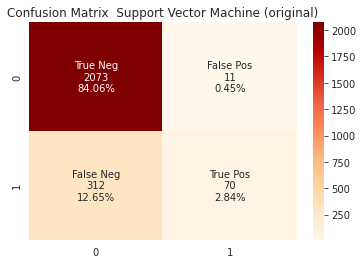

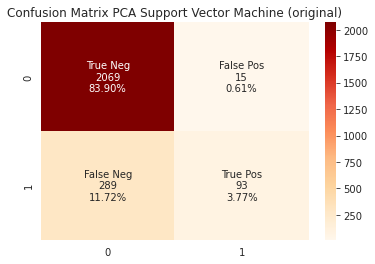

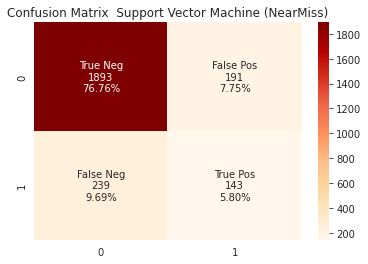

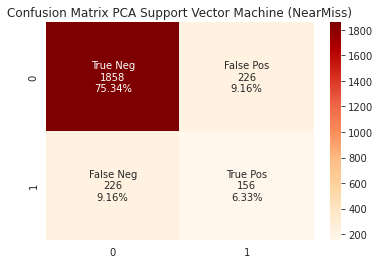

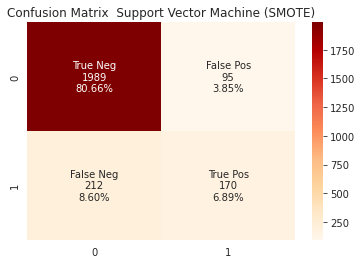

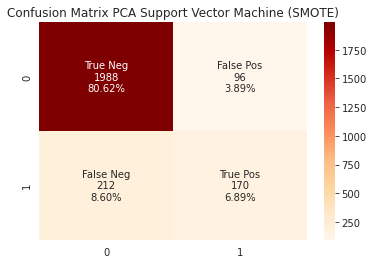

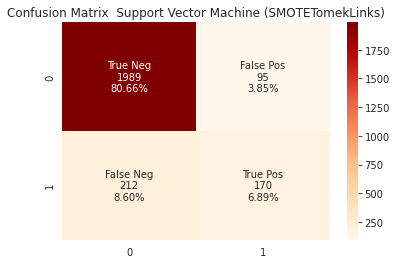

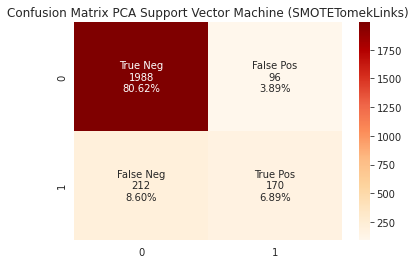

In [63]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('SVM', 'original', results)
confusion_matrixes('SVM', 'original', results_pca, pca='PCA')

confusion_matrixes('SVM', 'undersampling', results)
confusion_matrixes('SVM', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('SVM', 'oversampling',results)
confusion_matrixes('SVM', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('SVM', 'both', results)
confusion_matrixes('SVM', 'both', results_pca, pca='PCA')

#### 6.3.3 AUROC

In [64]:
test_metrics['original']['SVM']['auroc'] = auroc ('SVM', 'original', results)
test_metrics['undersampling']['SVM']['auroc'] = auroc ('SVM', 'undersampling', results)
test_metrics['oversampling']['SVM']['auroc'] = auroc ('SVM', 'oversampling', results)
test_metrics['both']['SVM']['auroc'] =  auroc ('SVM', 'both', results)
print("")
test_metrics_pca['original']['SVM']['auroc'] = auroc ('SVM', 'original', results_pca, pca = 'PCA')
test_metrics_pca['undersampling']['SVM']['auroc'] = auroc ('SVM', 'undersampling', results_pca, pca = 'PCA')
test_metrics_pca['oversampling']['SVM']['auroc'] = auroc ('SVM', 'oversampling', results_pca, pca = 'PCA')
test_metrics_pca['both']['SVM']['auroc'] = auroc ('SVM', 'both', results_pca, pca = 'PCA')

SVM - AUROC  original:  0.5889838811789652
SVM - AUROC  NearMiss:  0.6413474389765954
SVM - AUROC  SMOTE:  0.6997203826712625
SVM - AUROC  SMOTETomekLinks:  0.6997203826712625

SVM - AUROC PCA original:  0.6181289003225774
SVM - AUROC PCA NearMiss:  0.6499658329229935
SVM - AUROC PCA SMOTE:  0.6994804594466943
SVM - AUROC PCA SMOTETomekLinks:  0.6994804594466943


### 6.4 Random Forest

### Without PCA

#### 6.4.1 Results

In [65]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['RF']['bestParamsF1'])
print('undersampling: ', models['undersampling']['RF']['bestParamsF1'])
print('oversampling: ', models['oversampling']['RF']['bestParamsF1'])
print('both: ', models['both']['RF']['bestParamsF1'])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['RF']['bestParamsF1'])
print('undersampling: ', models_PCA['undersampling']['RF']['bestParamsF1'])
print('oversampling: ', models_PCA['oversampling']['RF']['bestParamsF1'])
print('both: ', models_PCA['both']['RF']['bestParamsF1'])

Without PCA
original:  [0.9021272078472954, 100, 'log2', '-']
undersampling:  [0.7423522964859993, 10, 'sqrt', '-']
oversampling:  [0.8835267864349425, 100, 'sqrt', '-']
both:  [0.8850950066406075, 100, 'log2', '-']

With PCA
original:  [0.9023982994897046, 10, 'sqrt', '-']
undersampling:  [0.7385595136233032, 10, 'sqrt', '-']
oversampling:  [0.8830495077261729, 1000, 'sqrt', '-']
both:  [0.8839675552842454, 1000, 'log2', '-']


In [66]:
# results['original']['RF']['params']= {'n_estimators':100, 'max_features':'log2'}
# results['undersampling']['RF']['params']= {'n_estimators':100, 'max_features':'sqrt'}
# results['oversampling']['RF']['params']={'n_estimators':100, 'max_features':'sqrt'}
# results['both']['RF']['params'] = {'n_estimators':1000, 'max_features':'sqrt'}

# results_pca['original']['RF']['params']= {'n_estimators':100, 'max_features':'sqrt'}
# results_pca['undersampling']['RF']['params']= {'n_estimators':10, 'max_features':'sqrt'}
# results_pca['oversampling']['RF']['params']={'n_estimators':1000, 'max_features':'log2'}
# results_pca['both']['RF']['params'] = {'n_estimators':1000, 'max_features':'log2'}

results['original']['RF']['params']= {'n_estimators':100, 'max_features':'log2'}
results['undersampling']['RF']['params']= {'n_estimators':10, 'max_features':'sqrt'}
results['oversampling']['RF']['params']={'n_estimators':100, 'max_features':'sqrt'}
results['both']['RF']['params'] = {'n_estimators':100, 'max_features':'log2'}

results_pca['original']['RF']['params']= {'n_estimators':10, 'max_features':'sqrt'}
results_pca['undersampling']['RF']['params']= {'n_estimators':10, 'max_features':'sqrt'}
results_pca['oversampling']['RF']['params']={'n_estimators':1000, 'max_features':'sqrt'}
results_pca['both']['RF']['params'] = {'n_estimators':1000, 'max_features':'log2'}


In [67]:
rf = RandomForestClassifier()

results['original']['RF']['predictions'] = rf.set_params(**results['original']['RF']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['RF']['predictions'] = rf.set_params(**results['undersampling']['RF']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['RF']['predictions'] = rf.set_params(**results['oversampling']['RF']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['RF']['predictions'] = rf.set_params(**results['both']['RF']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['RF']['predictions']= rf.set_params(**results_pca['original']['RF']['params']).fit(X_train_pca, y_train).predict(X_test_pca)
results_pca['undersampling']['RF']['predictions'] = rf.set_params(**results_pca['undersampling']['RF']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['RF']['predictions'] = rf.set_params(**results_pca['oversampling']['RF']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['RF']['predictions'] = rf.set_params(**results_pca['both']['RF']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [68]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'RF'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]

print(classification_report(results['original']['RF']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['RF']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['RF']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['RF']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['RF']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['undersampling']['RF']['predictions'], y_test, output_dict=True))
print( classification_report(results_pca['oversampling']['RF']['predictions'], y_test, output_dict=True))
print(classification_report(results_pca['both']['RF']['predictions'], y_test, output_dict=True))

{'0': {'precision': 0.9697696737044146, 'recall': 0.9178019981834695, 'f1-score': 0.943070461969202, 'support': 2202}, '1': {'precision': 0.5261780104712042, 'recall': 0.7613636363636364, 'f1-score': 0.6222910216718266, 'support': 264}, 'accuracy': 0.9010543390105434, 'macro avg': {'precision': 0.7479738420878094, 'recall': 0.8395828172735529, 'f1-score': 0.7826807418205143, 'support': 2466}, 'weighted avg': {'precision': 0.9222805418740952, 'recall': 0.9010543390105434, 'f1-score': 0.9087291106964903, 'support': 2466}}
{'0': {'precision': 0.7701535508637236, 'recall': 0.963963963963964, 'f1-score': 0.8562283275540145, 'support': 1665}, '1': {'precision': 0.8429319371727748, 'recall': 0.4019975031210986, 'f1-score': 0.5443786982248521, 'support': 801}, 'accuracy': 0.7814274128142741, 'macro avg': {'precision': 0.8065427440182492, 'recall': 0.6829807335425313, 'f1-score': 0.7003035128894333, 'support': 2466}, 'weighted avg': {'precision': 0.7937932456867366, 'recall': 0.7814274128142741

#### 6.4.2 Confusion Matrix

Test dataset samples:  2466


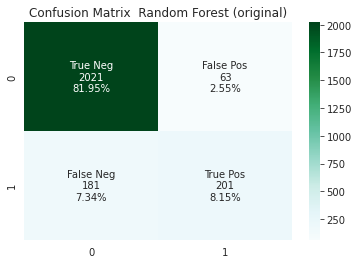

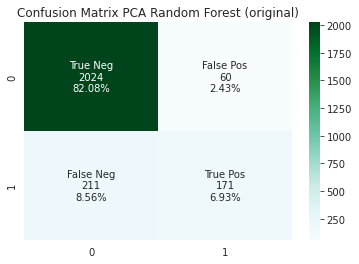

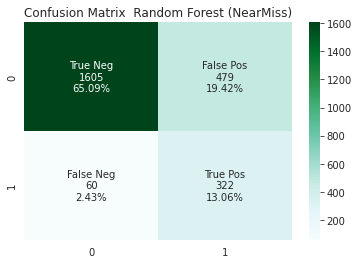

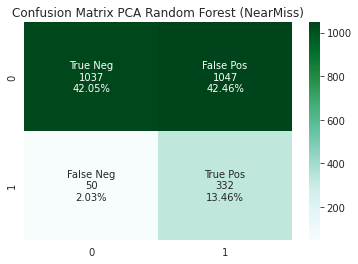

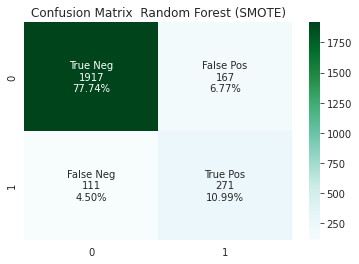

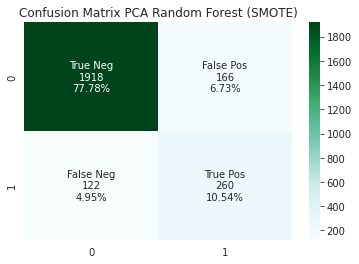

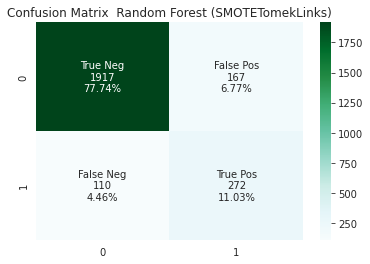

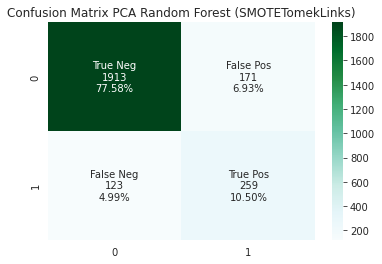

In [69]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('RF', 'original', results)
confusion_matrixes('RF', 'original', results_pca, pca='PCA')

confusion_matrixes('RF', 'undersampling', results)
confusion_matrixes('RF', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('RF', 'oversampling',results)
confusion_matrixes('RF', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('RF', 'both', results)
confusion_matrixes('RF', 'both', results_pca, pca='PCA')

#### 6.4.3 AUROC

In [70]:
test_metrics['original']['RF']['auroc'] = auroc ('RF', 'original', results)
test_metrics['undersampling']['RF']['auroc'] = auroc ('RF', 'undersampling', results)
test_metrics['oversampling']['RF']['auroc'] = auroc ('RF', 'oversampling', results)
test_metrics['both']['RF']['auroc'] = auroc ('RF', 'both', results)
print("")
test_metrics_pca['original']['RF']['auroc'] = auroc ('RF', 'original', results_pca, pca = 'PCA')
test_metrics_pca['undersampling']['RF']['auroc'] = auroc ('RF', 'undersampling', results_pca, pca = 'PCA')
test_metrics_pca['oversampling']['RF']['auroc'] = auroc ('RF', 'oversampling', results_pca, pca = 'PCA')
test_metrics_pca['both']['RF']['auroc'] = auroc ('RF', 'both', results_pca, pca = 'PCA')

RF - AUROC  original:  0.7479738420878094
RF - AUROC  NearMiss:  0.8065427440182492
RF - AUROC  SMOTE:  0.8146448633819376
RF - AUROC  SMOTETomekLinks:  0.8159537639054978

RF - AUROC PCA original:  0.7094265960547076
RF - AUROC PCA NearMiss:  0.6833553576991489
RF - AUROC PCA SMOTE:  0.8004868808473437
RF - AUROC PCA SMOTETomekLinks:  0.7979783642009427


In [71]:
test_metrics_pca['original']['SVM']

{'accuracy': 0.8767234387672344,
 'precision': 0.9599841949762074,
 'recall': 0.8767234387672344,
 'f1-score': 0.9073884677985077,
 'auroc': 0.6181289003225774}

In [70]:
test_metrics_x = pd.DataFrame.from_dict(test_metrics['original'])
test_metrics_x

,LR,KNN,SVM,RF
accuracy,0.881995,0.871046,0.869019,0.897405
precision,0.940549,0.952154,0.968067,0.920927
recall,0.881995,0.871046,0.869019,0.897405
f1-score,0.903038,0.901618,0.907184,0.905946
auroc,0.656524,0.611563,0.588984,0.737263


In [75]:
models_auroc = {}
models_auroc_pca = {}

for d in datasets:
  models_auroc[d] = {}
  models_auroc_pca[d] = {}
  for mn in models_names:
    models_auroc[d][mn] = test_metrics[d][mn]['auroc']
    models_auroc_pca[d][mn] = test_metrics_pca[d][mn]['auroc']


In [85]:
models_auroc=pd.DataFrame.from_dict(models_auroc)
models_auroc

,original,undersampling,oversampling,both
LR,0.656524,0.792819,0.802822,0.801273
KNN,0.611563,0.692029,0.704852,0.704372
SVM,0.588984,0.641347,0.699720,0.699720
RF,0.747974,0.806543,0.814645,0.815954


In [86]:
models_auroc_pca=pd.DataFrame.from_dict(models_auroc_pca)
models_auroc_pca

,original,undersampling,oversampling,both
LR,0.658902,0.775457,0.821453,0.821453
KNN,0.653666,0.687723,0.699352,0.700181
SVM,0.618129,0.649966,0.699480,0.699480
RF,0.709427,0.683355,0.800487,0.797978


In [97]:
def plot_barchart_metrics_auroc (df, pca=''):
  
  #the dataframe has as index the model name, in order to plot it seaborn must 
  #receive a dataframe with numerical indices, so we reset the index and call
  #the old index column as 'Model'
  df = df.reset_index().rename(columns={'index':'Model'})
  
  #to properly plot the barchart we need to transform our dataset in the following
  #way:
  #
  # columns:  Models (LR, KNN, SVM, RF), Metric (accuracy, precision, ...) and
  #           Value (value of the corresponding metric)
  df_new = pd.melt(df, id_vars='Model', var_name='Scenario', value_name='Value') #I need to transofrm my df to properly plot the barchart

  #chose coherent colors (blue for LR, orange for KNN, red for SVM and green for RF)
  hue_order = ['RF', 'SVM', 'LR', 'KNN']

  colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
  
  #factorplot is better since put the legend outside the graph while barplot put
  #it inside over the bars
  
  sns.factorplot(data=df_new,  x = 'Scenario', y = 'Value', hue='Model',hue_order = hue_order,kind='bar', palette = colors)

  plt.title(f"auROC {pca}")


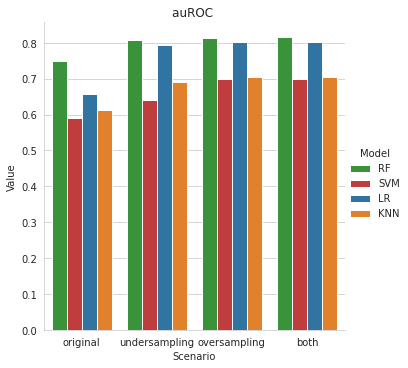

In [98]:
plot_barchart_metrics_auroc (models_auroc, pca='')

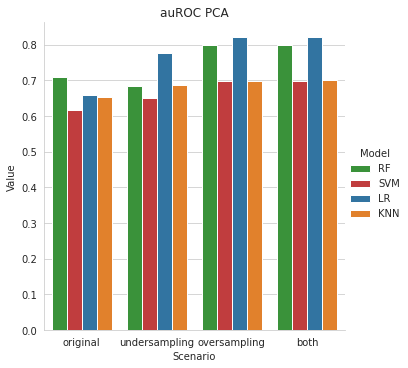

In [99]:
plot_barchart_metrics_auroc (models_auroc_pca, pca='PCA')

## 7 Tables and Plots

###7.1 Tables

In [71]:
def show_table_metrics (test_metrics, dataset, pca=''):
  test_metrics_df = pd.DataFrame.from_dict(test_metrics[dataset])
  print(test_metrics_df.columns)
  print(f"Test metrics {dataset} {pca}")
  return test_metrics_df.T.sort_values(by='auroc', ascending=False), 

#### Original

In [85]:
test_metrics['original'] = show_table_metrics (test_metrics, 'original', pca='')
test_metrics['original']

ValueError: ignored

In [73]:
test_metrics_pca['original'] = show_table_metrics (test_metrics_pca, 'original', pca='PCA')
test_metrics_pca['original']

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics original PCA


(     accuracy  precision    recall  f1-score     auroc
 RF   0.893350   0.921911  0.893350  0.903673  0.720967
 LR   0.882401   0.939654  0.882401  0.902955  0.658902
 KNN  0.880779   0.940025  0.880779  0.902180  0.653666
 SVM  0.876723   0.959984  0.876723  0.907388  0.618129,)

#### Undersampling

In [74]:
test_metrics_undersampling = show_table_metrics (test_metrics, 'undersampling', pca='')
test_metrics_undersampling

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics undersampling 


(     accuracy  precision    recall  f1-score     auroc
 RF   0.774128   0.784956  0.774128  0.746583  0.795810
 LR   0.790754   0.791628  0.790754  0.767136  0.792819
 KNN  0.799270   0.781502  0.799270  0.787147  0.692029
 SVM  0.825629   0.836023  0.825629  0.830481  0.641347,)

In [75]:
test_metrics_undersampling_pca = show_table_metrics (test_metrics_pca, 'undersampling', pca='PCA')
test_metrics_undersampling_pca

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics undersampling PCA


(     accuracy  precision    recall  f1-score     auroc
 LR   0.766829   0.771016  0.766829  0.738743  0.775457
 KNN  0.692620   0.689662  0.692620  0.652426  0.687723
 RF   0.559205   0.692347  0.559205  0.502731  0.676134
 SVM  0.816707   0.816707  0.816707  0.816707  0.649966,)

#### Oversampling

In [76]:
test_metrics_oversampling = show_table_metrics (test_metrics, 'oversampling', pca='')
test_metrics_oversampling

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics oversampling 


(     accuracy  precision    recall  f1-score     auroc
 RF   0.890916   0.886403  0.890916  0.887983  0.821080
 LR   0.876318   0.870013  0.876318  0.872027  0.802822
 KNN  0.839011   0.835385  0.839011  0.837105  0.704852
 SVM  0.875507   0.899675  0.875507  0.885064  0.699720,)

In [77]:
test_metrics_oversampling_pca = show_table_metrics (test_metrics_pca, 'oversampling', pca='PCA')
test_metrics_oversampling_pca

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics oversampling PCA


(     accuracy  precision    recall  f1-score     auroc
 LR   0.873479   0.866265  0.873479  0.866859  0.821453
 RF   0.883212   0.878540  0.883212  0.880334  0.803694
 SVM  0.875101   0.899040  0.875101  0.884590  0.699480
 KNN  0.853204   0.860074  0.853204  0.856382  0.699352,)

#### Both

In [78]:
test_metrics_both = show_table_metrics (test_metrics, 'both', pca='')
test_metrics_both

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics both 


(     accuracy  precision    recall  f1-score     auroc
 RF   0.887267   0.883594  0.887267  0.885115  0.805024
 LR   0.875507   0.869139  0.875507  0.871188  0.801273
 KNN  0.838200   0.834268  0.838200  0.836124  0.704372
 SVM  0.875507   0.899675  0.875507  0.885064  0.699720,)

In [79]:
test_metrics_both_pca = show_table_metrics (test_metrics_pca, 'both', pca='PCA')
test_metrics_both_pca

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics both PCA


(     accuracy  precision    recall  f1-score     auroc
 LR   0.873479   0.866265  0.873479  0.866859  0.821453
 RF   0.881590   0.877096  0.881590  0.878888  0.798458
 KNN  0.852798   0.859075  0.852798  0.855719  0.700181
 SVM  0.875101   0.899040  0.875101  0.884590  0.699480,)

### 7.2 Plots

In [80]:
def plot_barchart_metrics (df, dataset, pca=''):
  
  #the dataframe has as index the model name, in order to plot it seaborn must 
  #receive a dataframe with numerical indices, so we reset the index and call
  #the old index column as 'Model'
  df = df.reset_index().rename(columns={'index':'Model'})
  
  #to properly plot the barchart we need to transform our dataset in the following
  #way:
  #
  # columns:  Models (LR, KNN, SVM, RF), Metric (accuracy, precision, ...) and
  #           Value (value of the corresponding metric)
  df_new = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Value') #I need to transofrm my df to properly plot the barchart

  #chose coherent colors (blue for LR, orange for KNN, red for SVM and green for RF)
  hue_order = ['RF', 'SVM', 'LR', 'KNN']

  colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
  
  #factorplot is better since put the legend outside the graph while barplot put
  #it inside over the bars
  
  sns.factorplot(data=df_new,  x = 'Metric', y = 'Value', hue='Model',hue_order = hue_order,kind='bar', palette = colors)

  plt.title(f"Metrics {dataset} {pca}")


In [81]:
# test_metrics = {}
# test_metrics_pca = {}

# for d in datasets:
#   test_metrics[d] = {}
#   test_metrics_pca[d] = {}

#   for mn in models_names:
#     test_metrics[d][mn]= {}
#     test_metrics_pca[d][mn] = {}




In [82]:
# models_auroc = {}

# for d in datasets:
#   models_auroc[d] = {}
#   for mn in models_names:
#     models_auroc[d][mn]= 

# models_auroc['Original'] = {}
# models_auroc_pca = {}


#### Original

In [83]:
test_metrics['original'] = show_table_metrics (test_metrics, 'original', pca='')
test_metrics['original'] 

Index(['LR', 'KNN', 'SVM', 'RF'], dtype='object')
Test metrics original 


(     accuracy  precision    recall  f1-score     auroc
 RF   0.897405   0.920927  0.897405  0.905946  0.737263
 LR   0.881995   0.940549  0.881995  0.903038  0.656524
 KNN  0.871046   0.952154  0.871046  0.901618  0.611563
 SVM  0.869019   0.968067  0.869019  0.907184  0.588984,)

In [84]:
plot_barchart_metrics(test_metrics_original, 'original')

AttributeError: ignored

In [ ]:
test_metrics_original_pca = show_table_metrics (test_metrics_pca, 'original', pca='PCA')
test_metrics_original_pca

In [ ]:
plot_barchart_metrics(test_metrics_original_pca, 'original', pca='PCA')

#### Undersampling

In [ ]:
test_metrics_undersampling = show_table_metrics (test_metrics, 'undersampling', pca='')
test_metrics_undersampling

In [ ]:
plot_barchart_metrics(test_metrics_undersampling, 'undersampling')

In [ ]:
test_metrics_undersampling_pca = show_table_metrics (test_metrics_pca, 'undersampling', pca='PCA')
test_metrics_undersampling_pca

In [ ]:
plot_barchart_metrics(test_metrics_undersampling_pca, 'undersampling', pca='PCA')

#### Oversampling

In [ ]:
test_metrics_oversampling = show_table_metrics (test_metrics, 'oversampling', pca='')
test_metrics_oversampling

In [ ]:
plot_barchart_metrics(test_metrics_oversampling, 'oversampling')

In [ ]:
test_metrics_oversampling_pca = show_table_metrics (test_metrics_pca, 'oversampling', pca='PCA')
test_metrics_oversampling_pca

In [ ]:
plot_barchart_metrics(test_metrics_oversampling_pca, 'oversampling', pca='PCA')

#### Both

In [ ]:
test_metrics_both = show_table_metrics (test_metrics, 'both', pca='')
test_metrics_both

In [ ]:
plot_barchart_metrics(test_metrics_both, 'both')

In [ ]:
test_metrics_both_pca = show_table_metrics (test_metrics_pca, 'both', pca='PCA')
test_metrics_both_pca

In [ ]:
plot_barchart_metrics(test_metrics_both_pca, 'both', pca='PCA')

In [ ]:
test_metrics_both_pca

In [ ]:
def plot_barchart_auroc (df, dataset, pca=''):
  
  #the dataframe has as index the model name, in order to plot it seaborn must 
  #receive a dataframe with numerical indices, so we reset the index and call
  #the old index column as 'Model'
  df = df.reset_index().rename(columns={'index':'Model'})
  
  #to properly plot the barchart we need to transform our dataset in the following
  #way:
  #
  # columns:  Models (LR, KNN, SVM, RF), Metric (accuracy, precision, ...) and
  #           Value (value of the corresponding metric)
  df_new = pd.melt(df, id_vars='Model', var_name='auROC', value_name='auroc') #I need to transofrm my df to properly plot the barchart

  #chose coherent colors (blue for LR, orange for KNN, red for SVM and green for RF)
  hue_order = ['RF', 'SVM', 'LR', 'KNN']

  colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
  
  #factorplot is better since put the legend outside the graph while barplot put
  #it inside over the bars
  
  sns.factorplot(data=df_new,  x = 'auROC', y = 'auroc', hue='Model',hue_order = hue_order,kind='bar', palette = colors)

  plt.title(f"Metrics {dataset} {pca}")


In [ ]:
plot_barchart_auroc(test_metrics_both_pca, 'both', pca='PCA')

In [ ]:
test_metrics_original.loc['LR']['auroc']

In [ ]:

models_auroc = {}

for d in datasets:
  models_auroc[d] = {}
  for mn in models_names:
    models_auroc[d][mn]= 

models_auroc['Original'] = {}
models_auroc_pca = {}


In [ ]:
#%% MODELS

from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

In [ ]:
#%%
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
# define model
lr = LogisticRegression(random_state=seed, class_weight=None)
accuracies=[]
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10, dataset=''):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        
        
        # print(f'Accuracy Score: {accuracy_score(y.iloc[tt],y_pred)}')
        # accuracies.append(accuracy_score(y.iloc[tt],y_pred))
        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )


    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, X.shape[0]],
    )
    ax.set_title("{}".format(type(cv).__name__)+f' ({dataset})', fontsize=15)
    return ax


fig, ax = plt.subplots()
n_splits=10
cv = StratifiedKFold(n_splits, shuffle=False)
X_train_smote, y_train_smote = shuffle(X_train_smote, y_train_smote)
plot_cv_indices(cv, X_train, y_train, y_train, ax, n_splits, dataset='original')


In [ ]:
# feat_imp = pd.Series(RFgrid_search.best_estimator_.feature_importances_, list(X_train_smote)).sort_values(ascending=False)
# fig = plt.figure(figsize=(12, 4))
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
# plt.grid()
# plt.show()